# Import Required Libraries
Import libraries such as pandas for data manipulation and matplotlib/seaborn for visualization.

In [3]:
# Import Required Libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations

# Configure default plot style
sns.set(style="whitegrid")

# Load and Explore the Dataset
Load the CSV file into a pandas DataFrame and display basic information such as column names, data types, and a preview of the data.

In [4]:
# Load and Explore the Dataset

# Load the CSV file into a pandas DataFrame
file_path = '/home/erik/git/migration-eu-analysis/Data/slovakia/slovak_immigration_international.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows of the dataset
print("\nPreview of the Dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198484 entries, 0 to 198483
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   citizen_country     198484 non-null  object
 1   citizen_ISO3        188412 non-null  object
 2   citizen_region      187521 non-null  object
 3   citizen_sub_region  187521 non-null  object
 4   age                 198484 non-null  object
 5   sex                 198484 non-null  object
 6   country             198484 non-null  object
 7   country_ISO3        198484 non-null  object
 8   year                198484 non-null  int64 
 9   count               198484 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 15.1+ MB
None

Preview of the Dataset:
  citizen_country citizen_ISO3 citizen_region citizen_sub_region    age  \
0         Andorra          AND         Europe    Southern Europe  TOTAL   
1         Andorra          AND         Europe    

# Total immigration to Slovakia

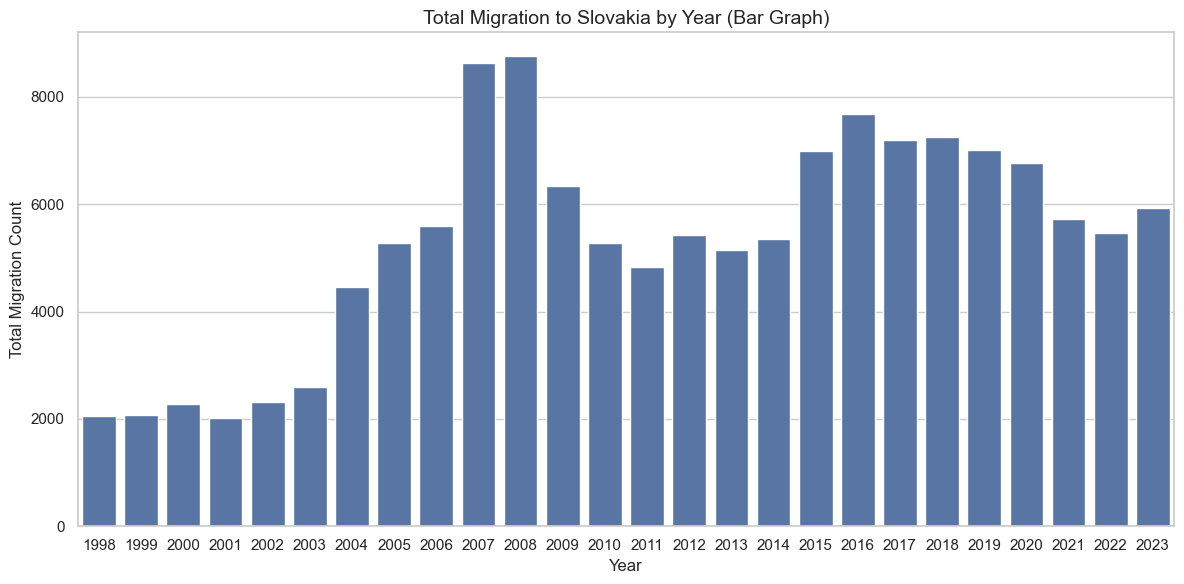

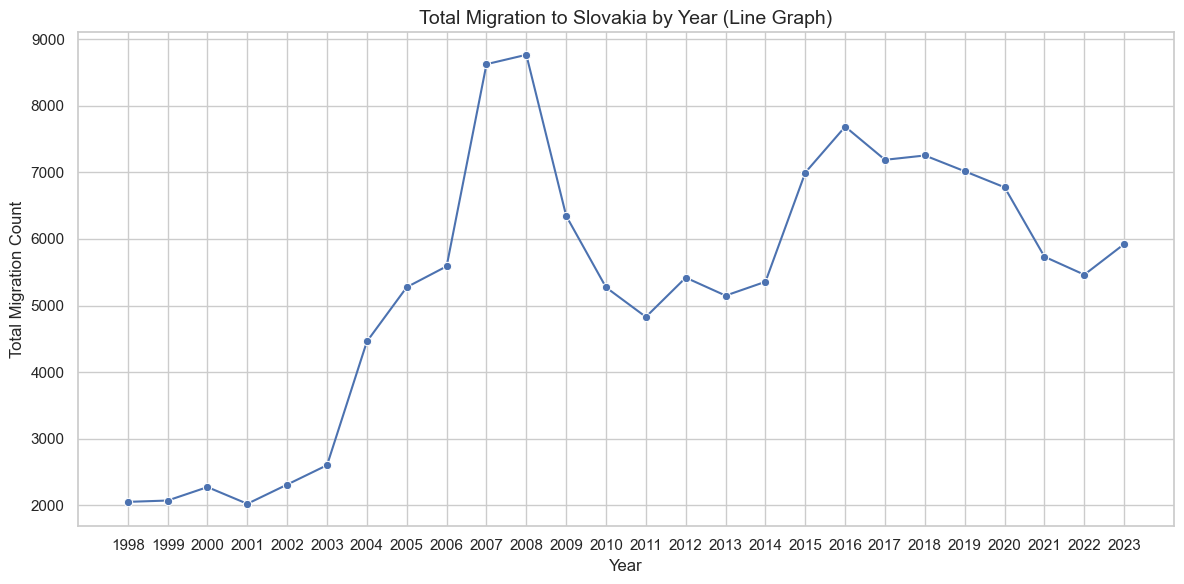

In [31]:
# Filter the dataset for Total sex, TOTAL age, and Total citizen_country
total_data = df[(df['sex'] == 'Total') & (df['age'] == 'TOTAL') & (df['citizen_country'] == 'Total')]

# Group by year and sum the migration counts
yearly_total_migration = total_data.groupby('year')['count'].sum().reset_index()

# Horizontal Bar Graph (Corrected to Vertical Bar Graph)
figure = plt.figure(figsize=(12, 6))
sns.barplot(
    data=yearly_total_migration,
    x='year',
    y='count',
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Migration Count', fontsize=12)
plt.title('Total Migration to Slovakia by Year (Bar Graph)', fontsize=14)
plt.tight_layout()
plt.show()

figure.savefig(f"../../Images/Slovakia/Migration/immigration/total_immigration_to_sk_bar.png", bbox_inches='tight')

# Line Graph
figure = plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_total_migration,
    x='year',
    y='count',
    marker='o',
    color='b'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Migration Count', fontsize=12)
plt.title('Total Migration to Slovakia by Year (Line Graph)', fontsize=14)
plt.xticks(ticks=yearly_total_migration['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

figure.savefig(f"../../Images/Slovakia/Migration/immigration/total_immigration_to_sk_line.png", bbox_inches='tight')

# Sort and Select Top 20 Countries
Sort the aggregated data in descending order by migration count and select the top 20 countries.

In [6]:
# Sort and Select Top 20 Countries

filtered_df = df[(df['sex'] == 'Total') & (df['age'] == 'TOTAL') & (df['citizen_country'] != 'Total')]
country_migration = filtered_df.groupby('citizen_country')['count'].sum().reset_index()
country_migration = country_migration.sort_values(by='count', ascending=False)

# Sort the data in descending order of migration count and select the top 20 countries
top_20_countries = country_migration.head(20)

# Display the top 20 countries
print("Top 20 Countries by Migration to Slovakia (Excluding Total):")
print(top_20_countries)

Top 20 Countries by Migration to Slovakia (Excluding Total):
    citizen_country  count
186        Slovakia  48462
50          Czechia   8929
91          Hungary   8477
166         Romania   6521
162          Poland   3028
216         Ukraine   2892
77          Germany   2811
100           Italy   2301
30         Bulgaria   1671
218  United Kingdom   1669
11          Austria   1364
71           France   1147
194           Spain    962
167          Russia    943
46          Croatia    825
225        Viet Nam    685
150          Norway    573
180          Serbia    554
80           Greece    449
41            China    446


# Visualize the Top 20 Countries
Create a bar plot to visualize the top 20 countries with the highest migration counts to Slovakia.

/tmp/ipykernel_576653/779092784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


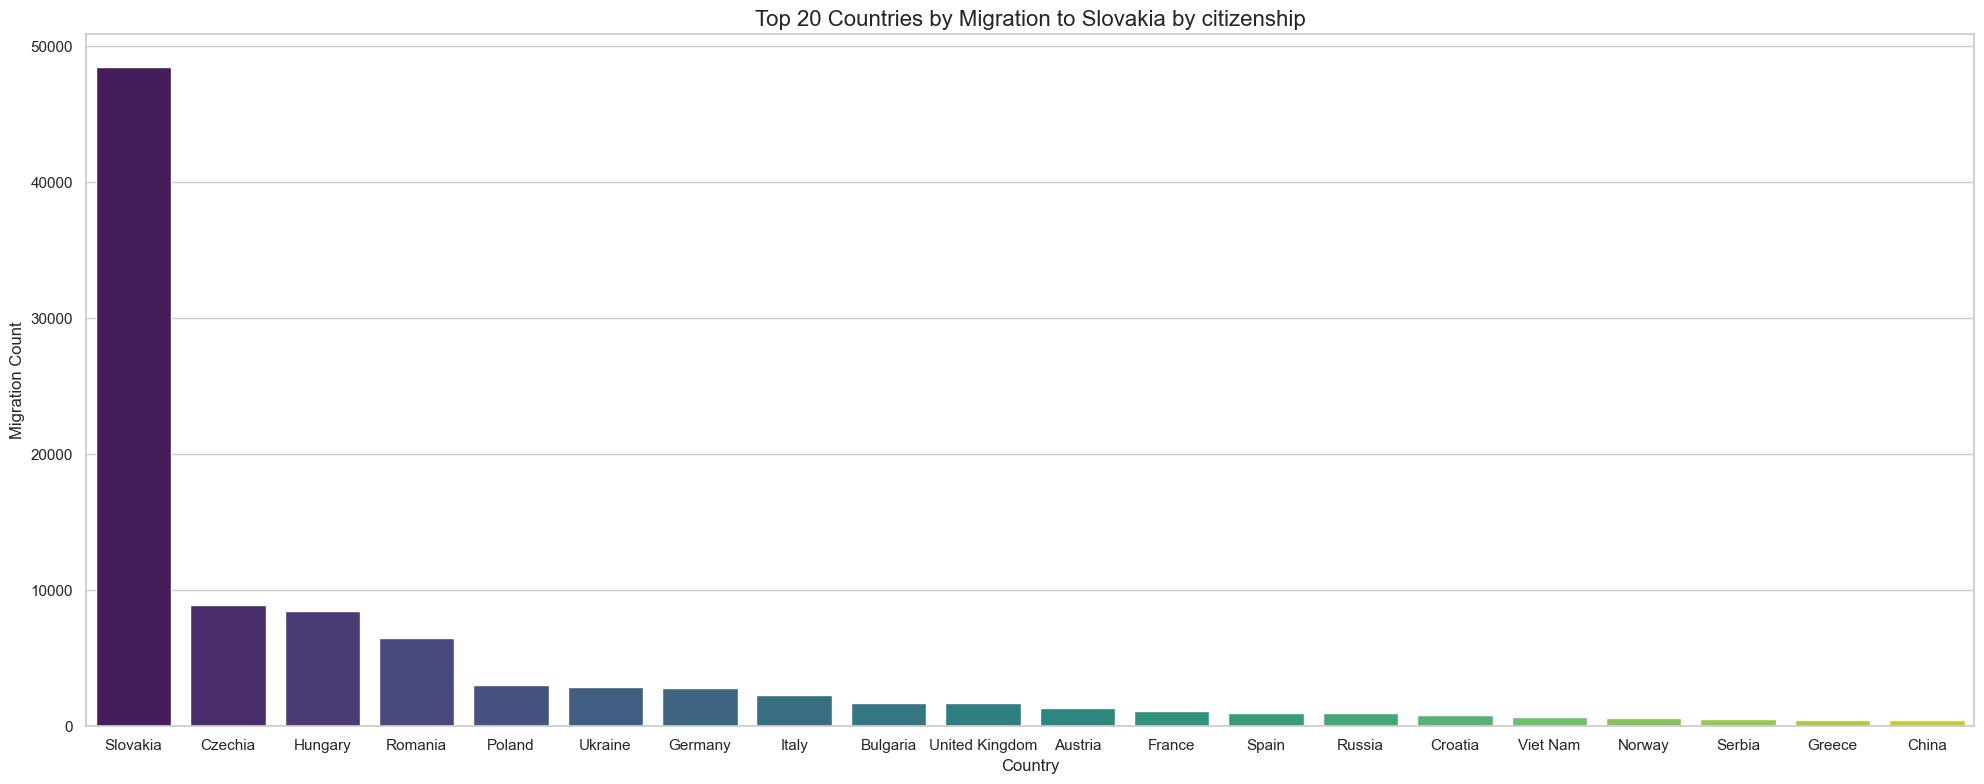

In [30]:
# Visualize the Top 20 Countries (Horizontal Bar Plot)
figure = plt.figure(figsize=(20, 8))
sns.barplot(
    data=top_20_countries,
    y='count',
    x='citizen_country',
    palette='viridis'
)

# Add labels and title to the plot
plt.ylabel('Migration Count', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.title('Top 20 Countries by Migration to Slovakia by citizenship', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

figure.savefig(f"../../Images/Slovakia/Migration/immigration/top_immigration.png", bbox_inches='tight')

/tmp/ipykernel_576653/4163957243.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


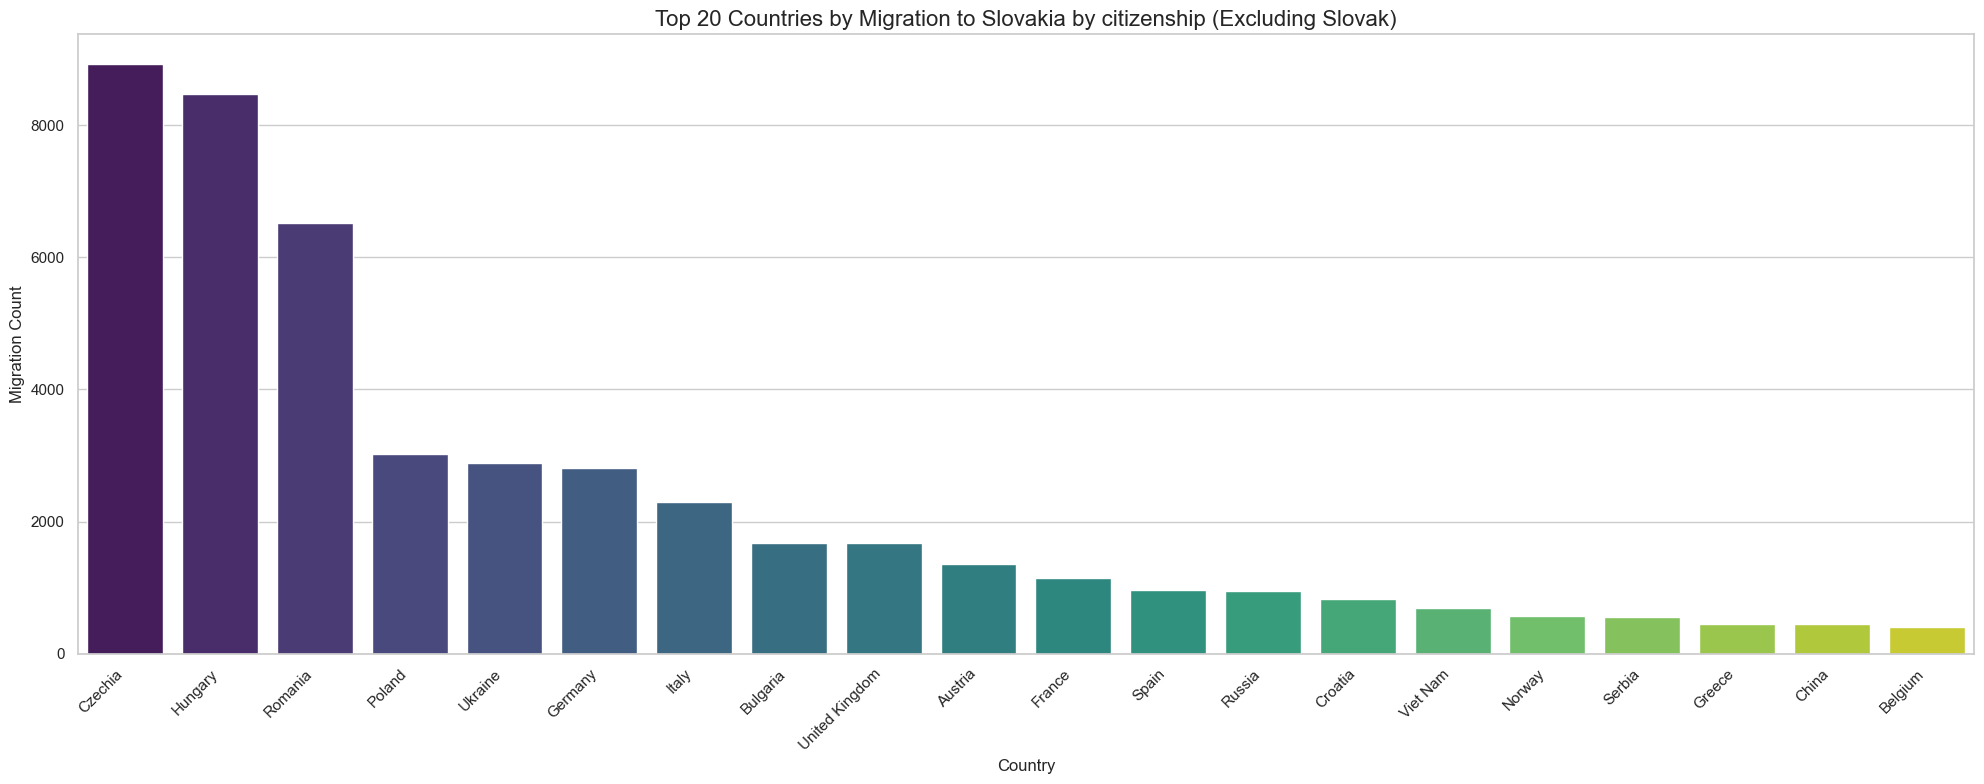

In [29]:
# Exclude Slovakia and ensure there are 20 countries
country_migration_no_slovakia = country_migration[country_migration['citizen_country'] != 'Slovakia']

# Sort the data in descending order of migration count and select the top 20 countries
top_20_countries_no_slovakia = country_migration_no_slovakia.head(20)

# Visualize the Top 20 Countries (Vertical Bar Plot) excluding Slovakia
figure = plt.figure(figsize=(20, 8))
sns.barplot(
    data=top_20_countries_no_slovakia,
    x='citizen_country',  # Country names on the x-axis
    y='count',  # Migration count on the y-axis
    palette='viridis'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title to the plot
plt.xlabel('Country', fontsize=12)
plt.ylabel('Migration Count', fontsize=12)
plt.title('Top 20 Countries by Migration to Slovakia by citizenship (Excluding Slovak)', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

figure.savefig(f"../../Images/Slovakia/Migration/immigration/top_immigration_no_sk.png", bbox_inches='tight')

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


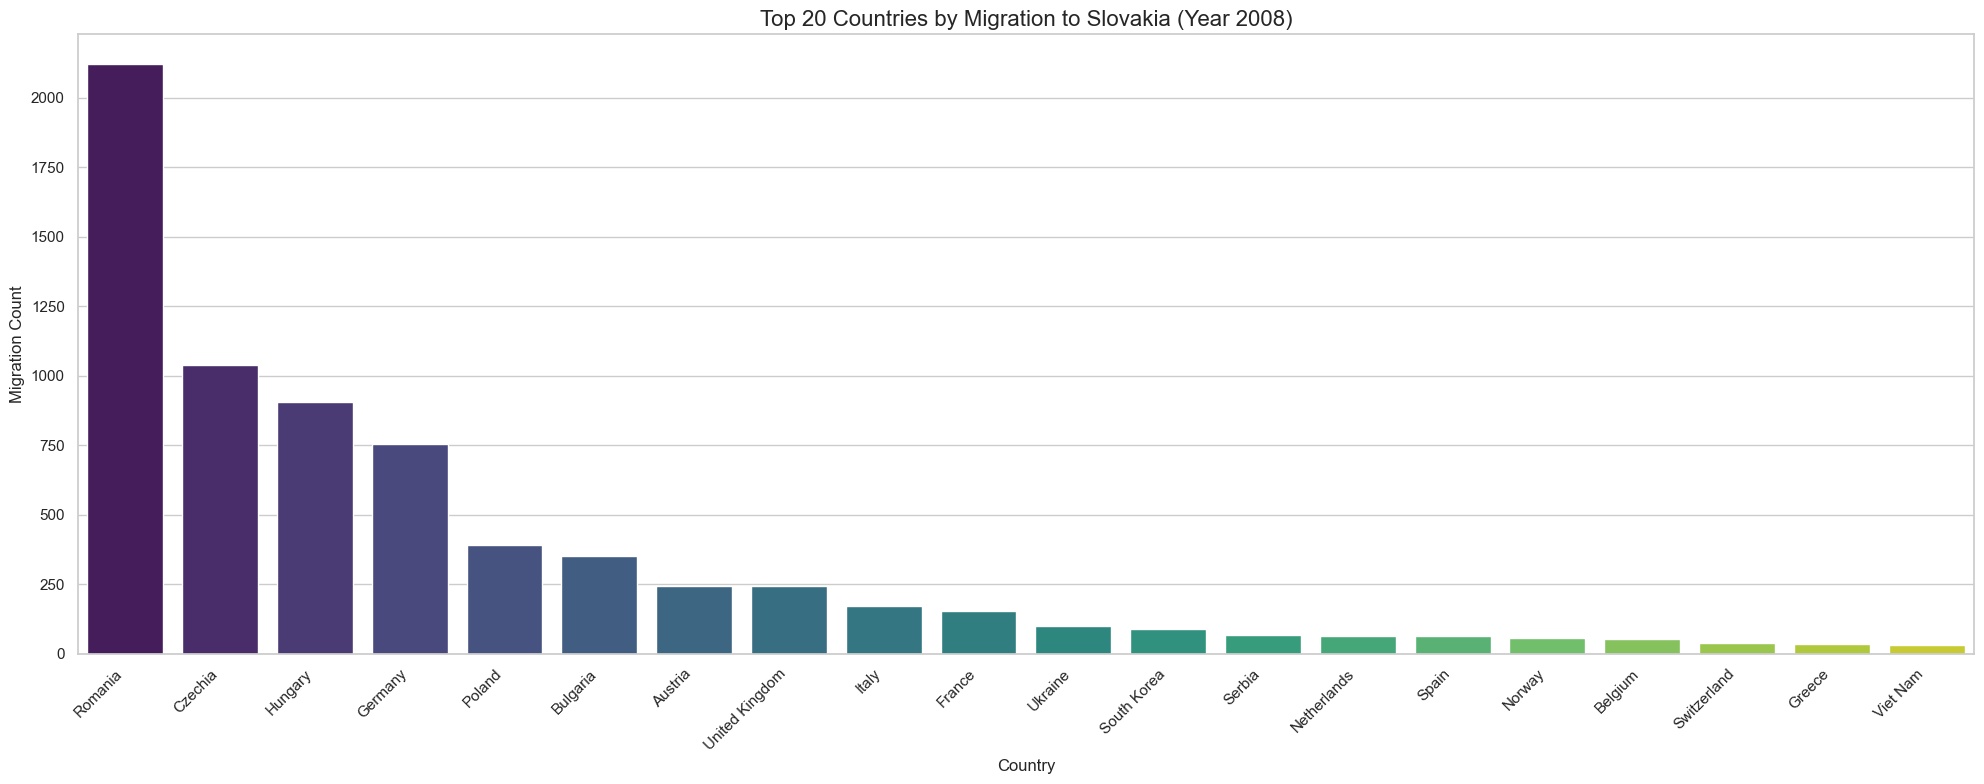

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


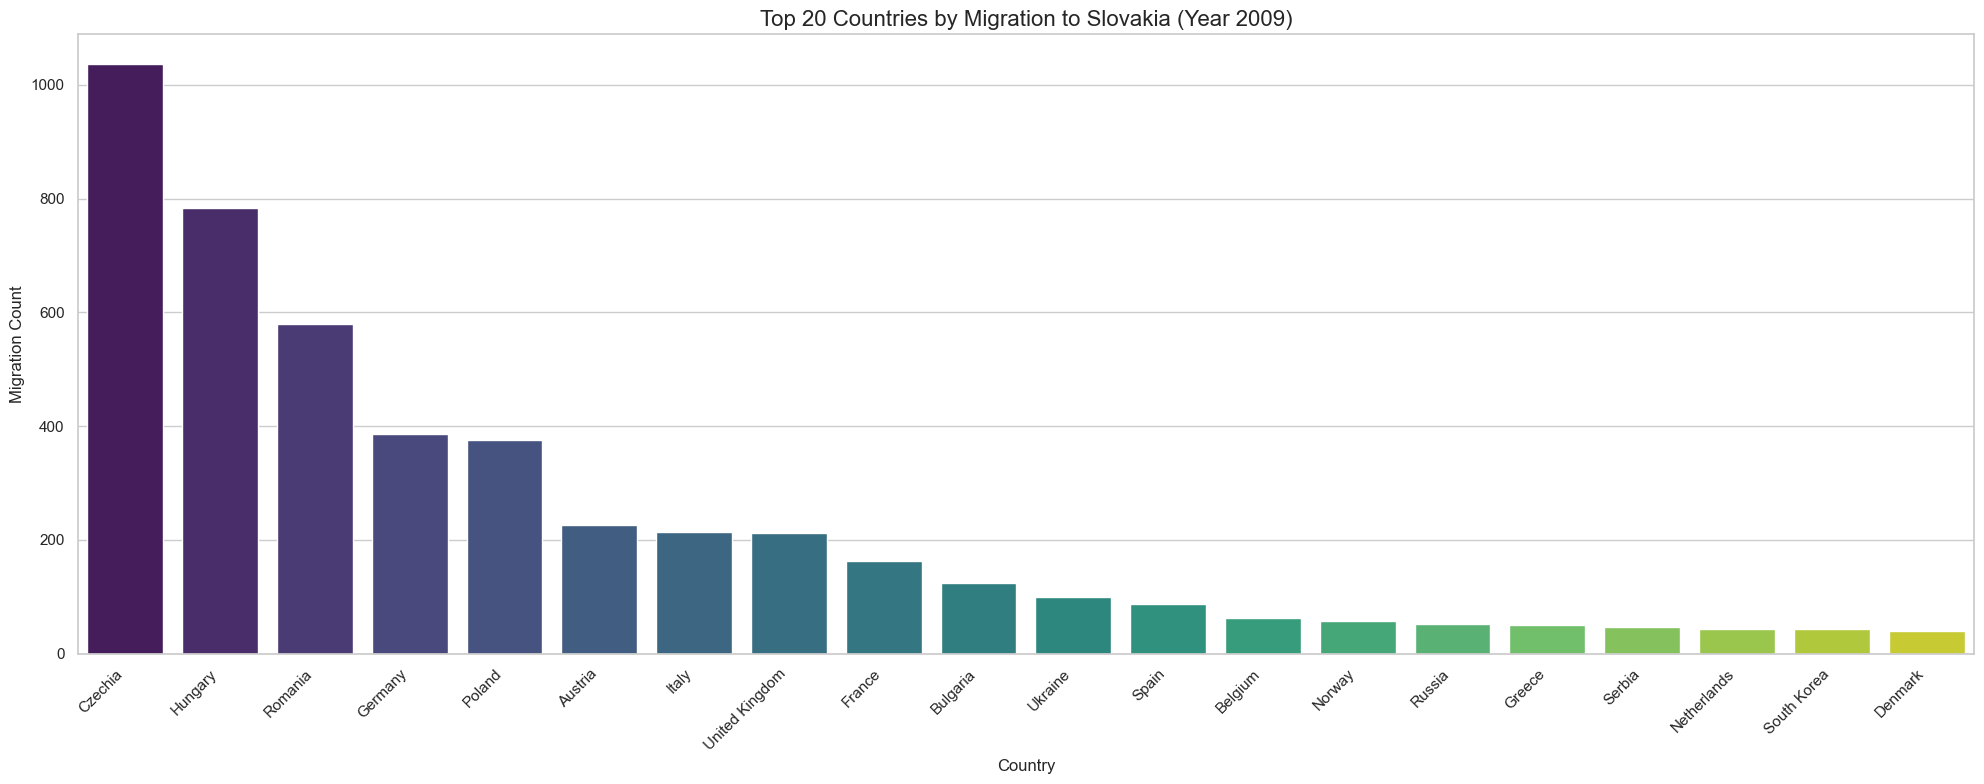

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


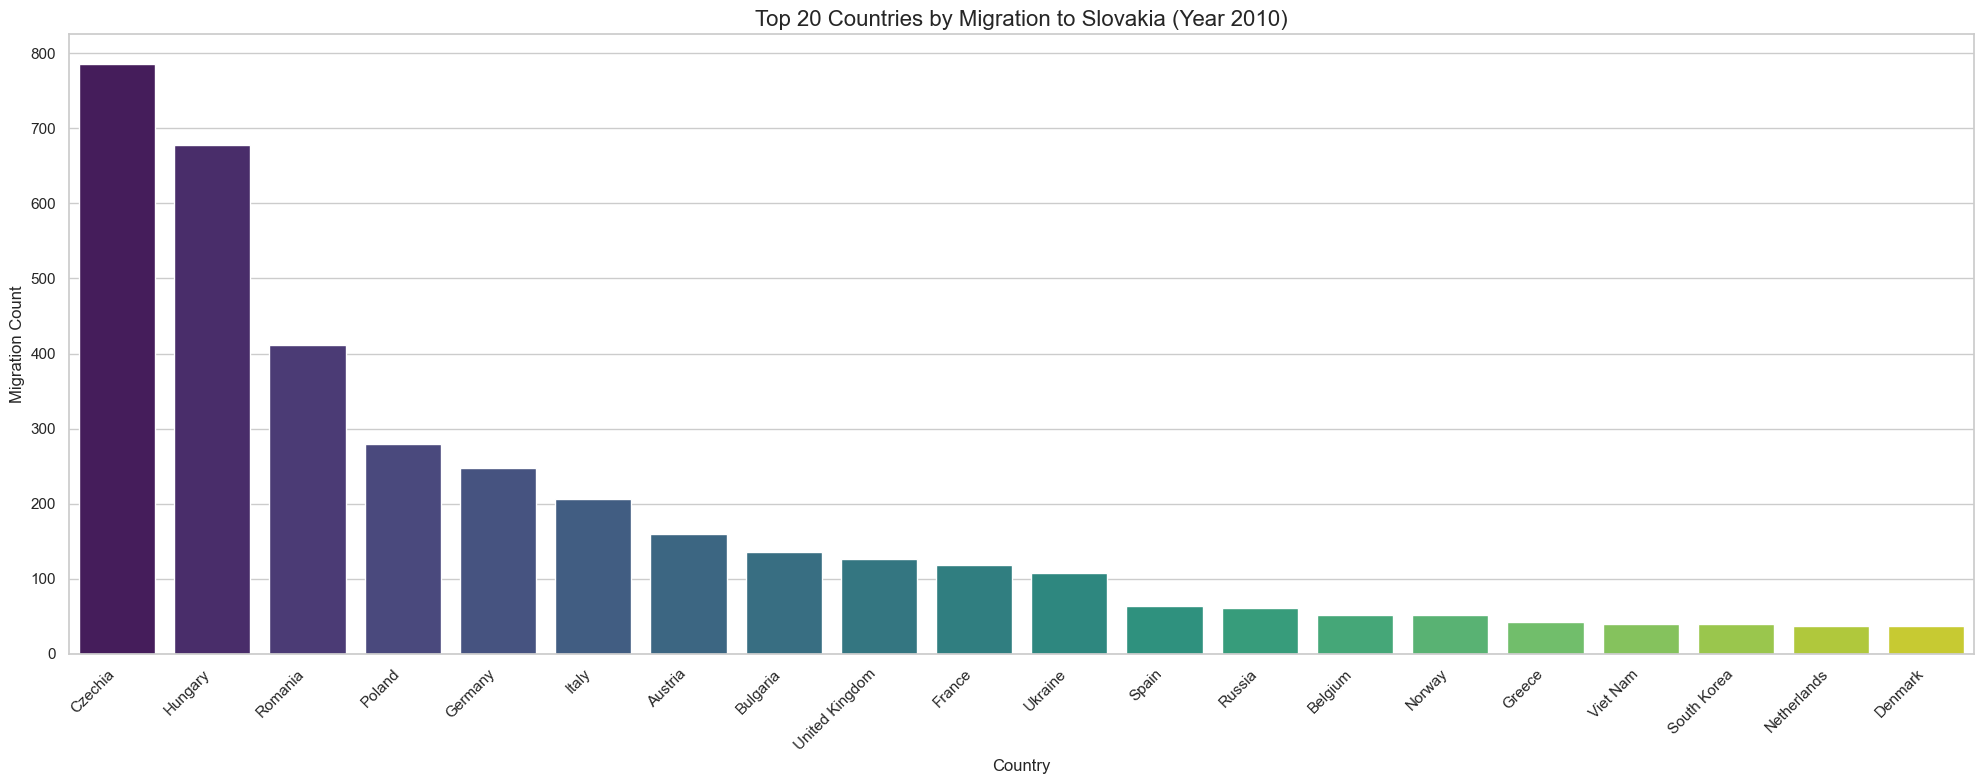

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


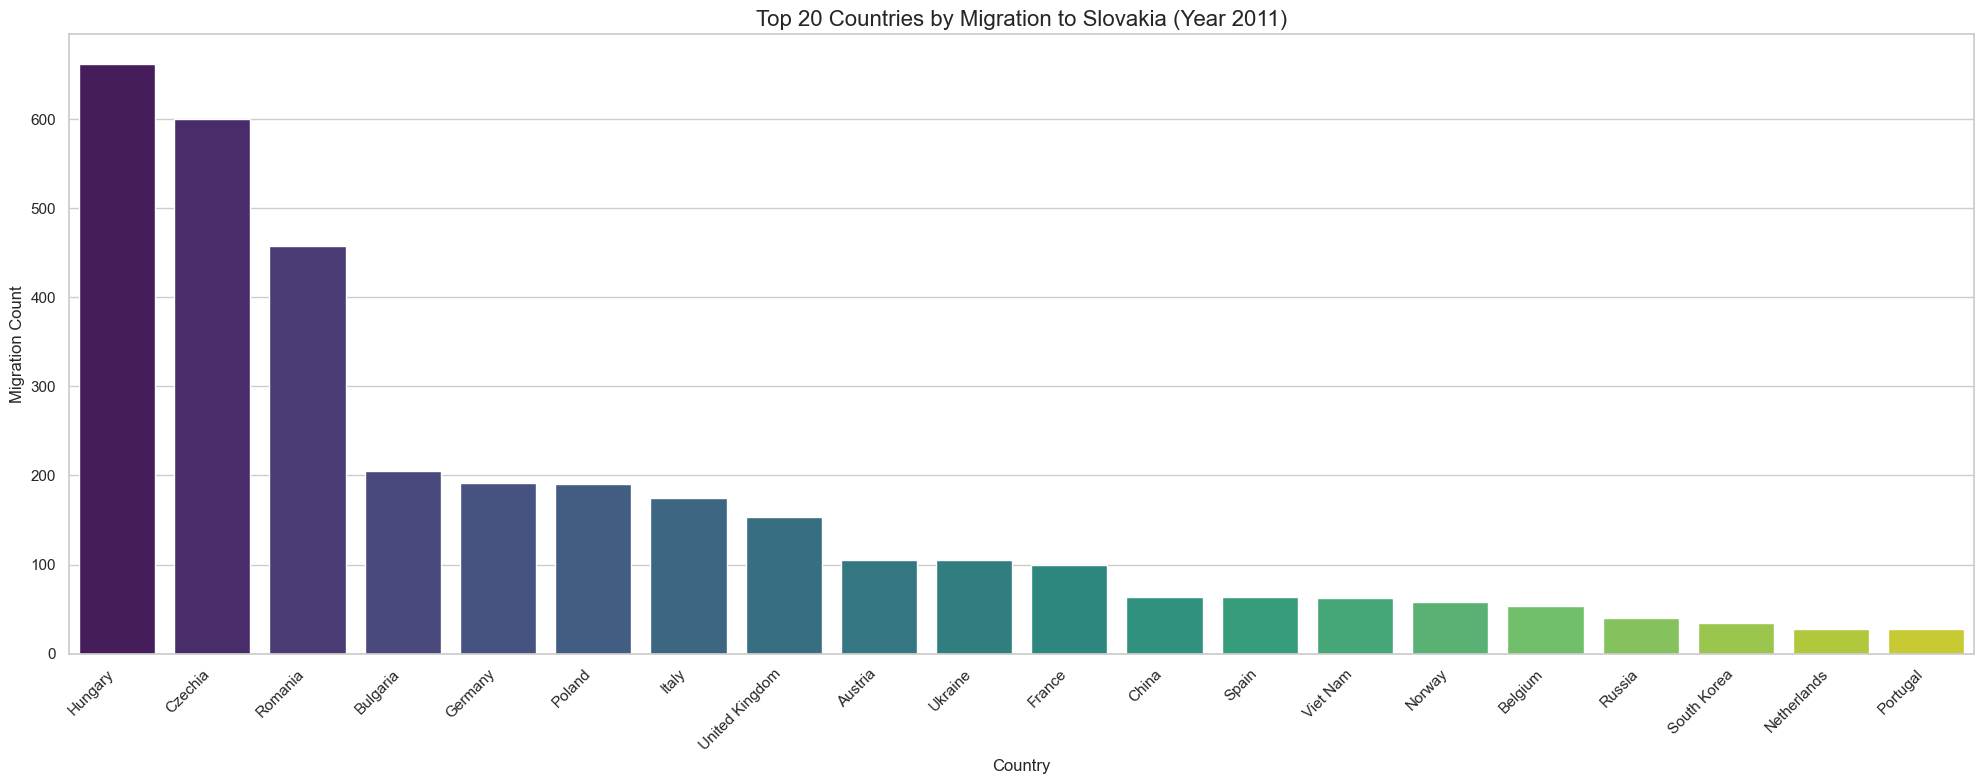

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


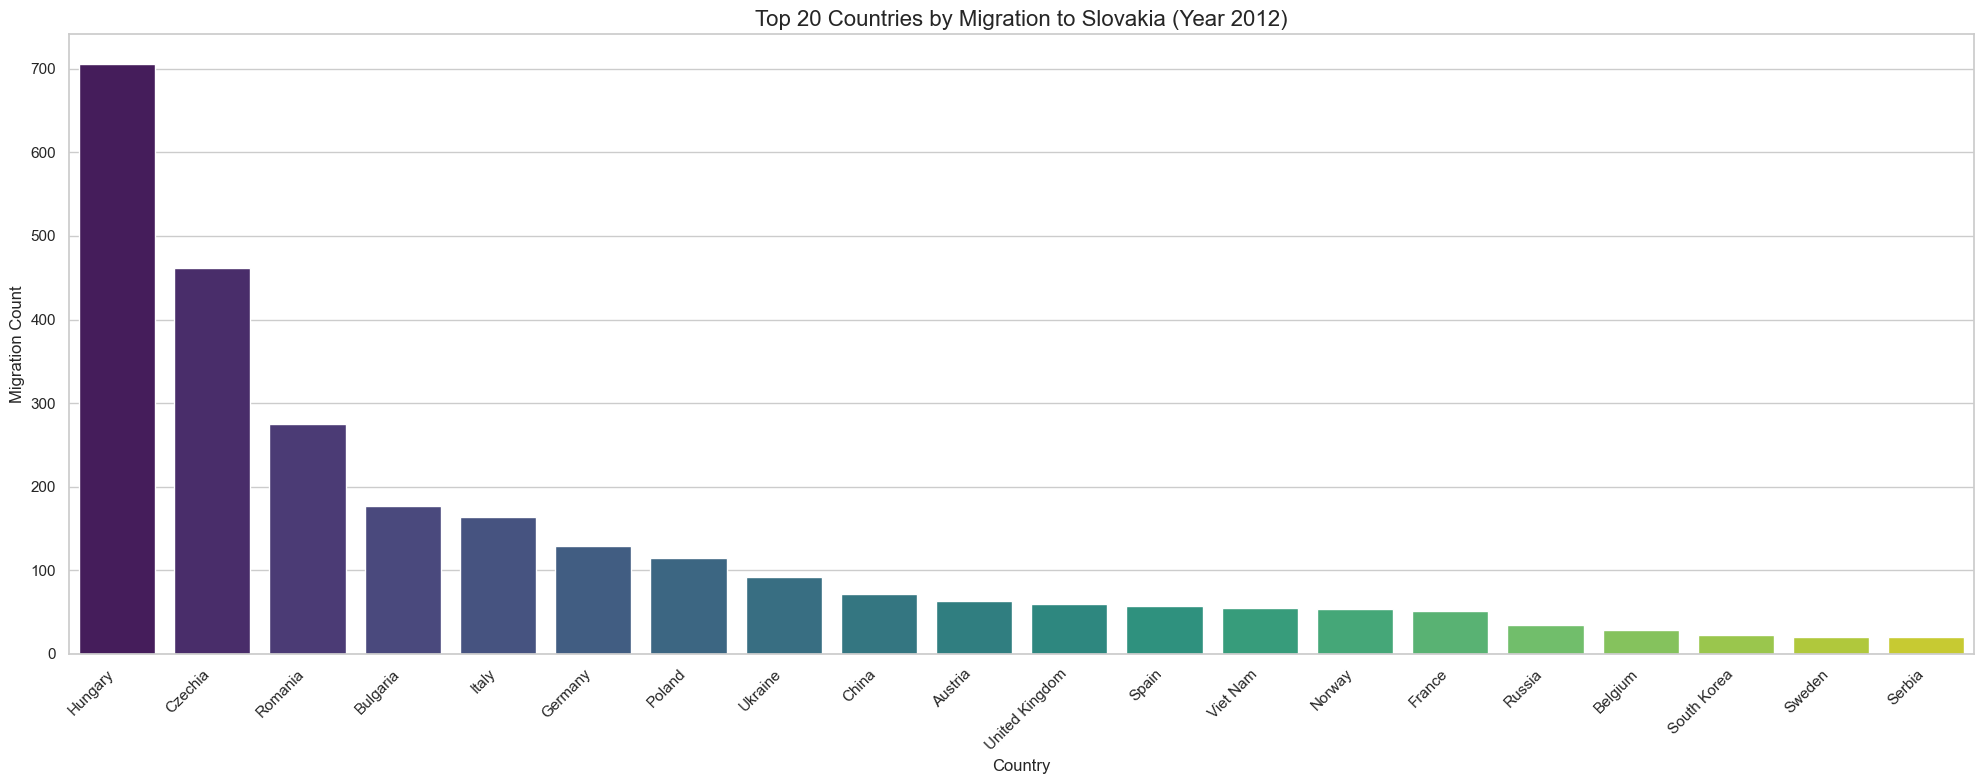

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


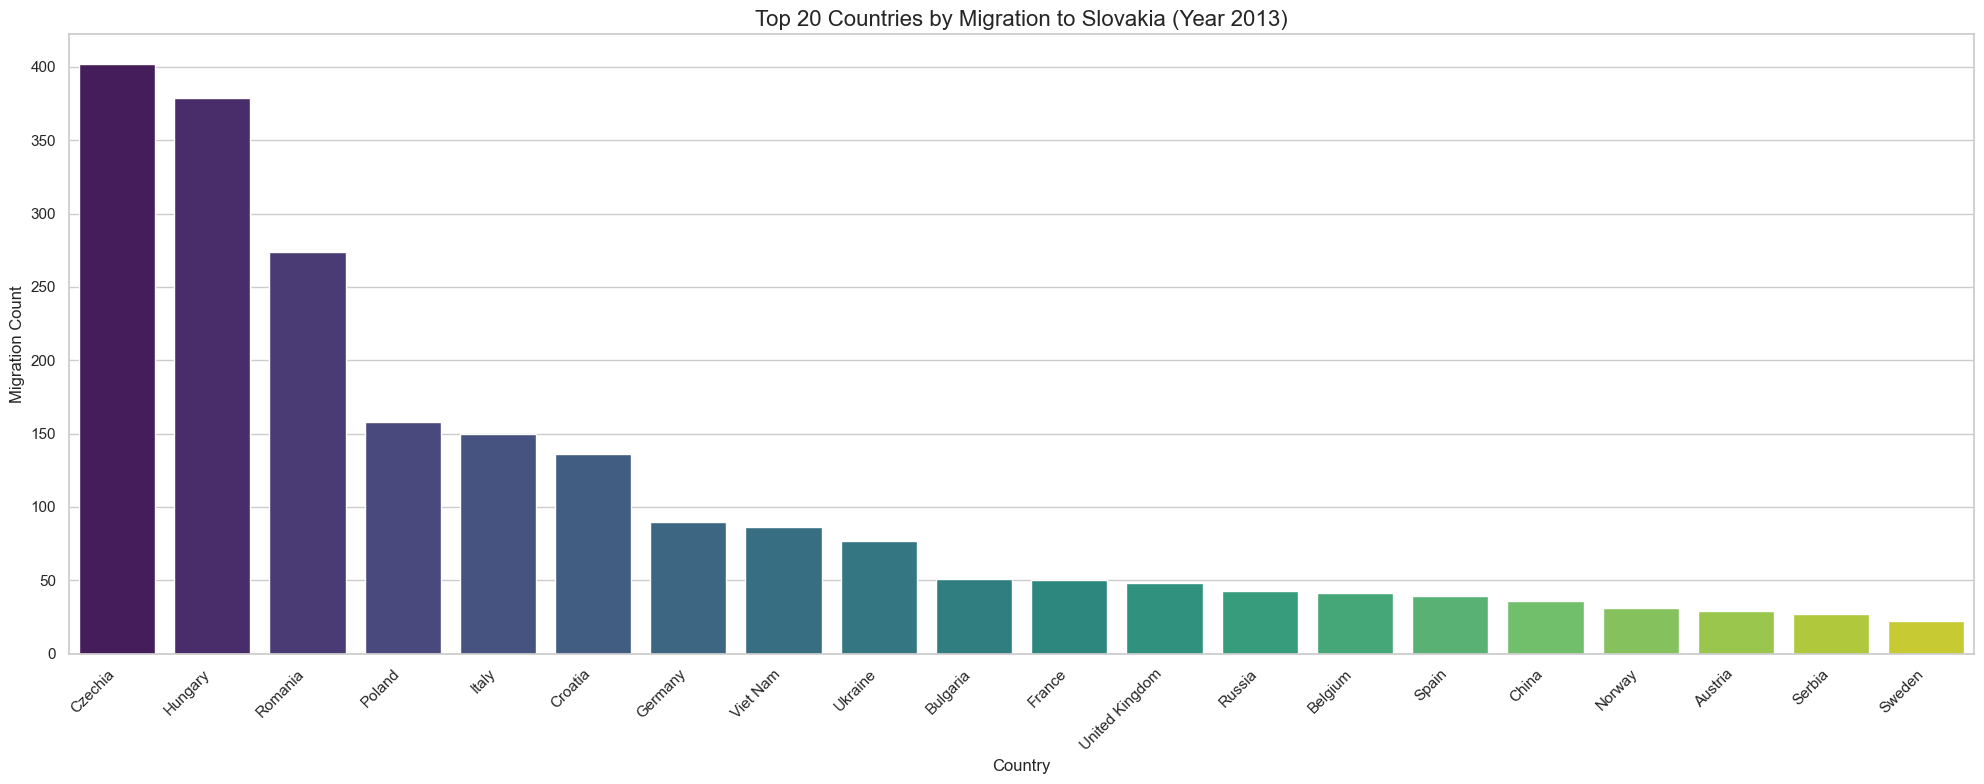

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


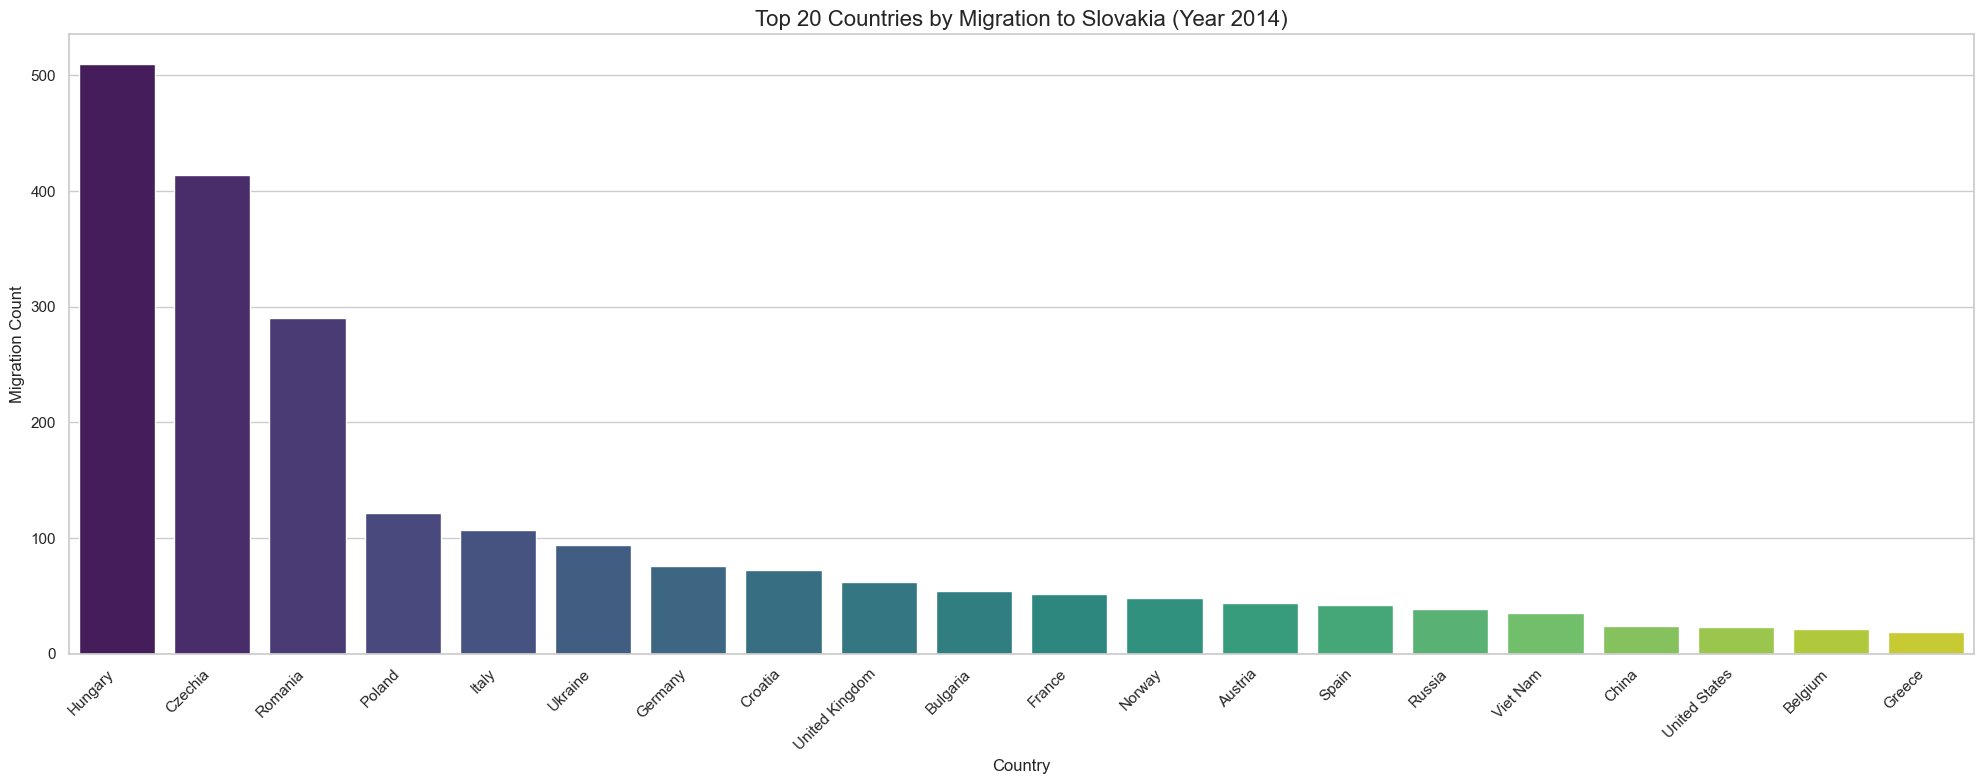

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


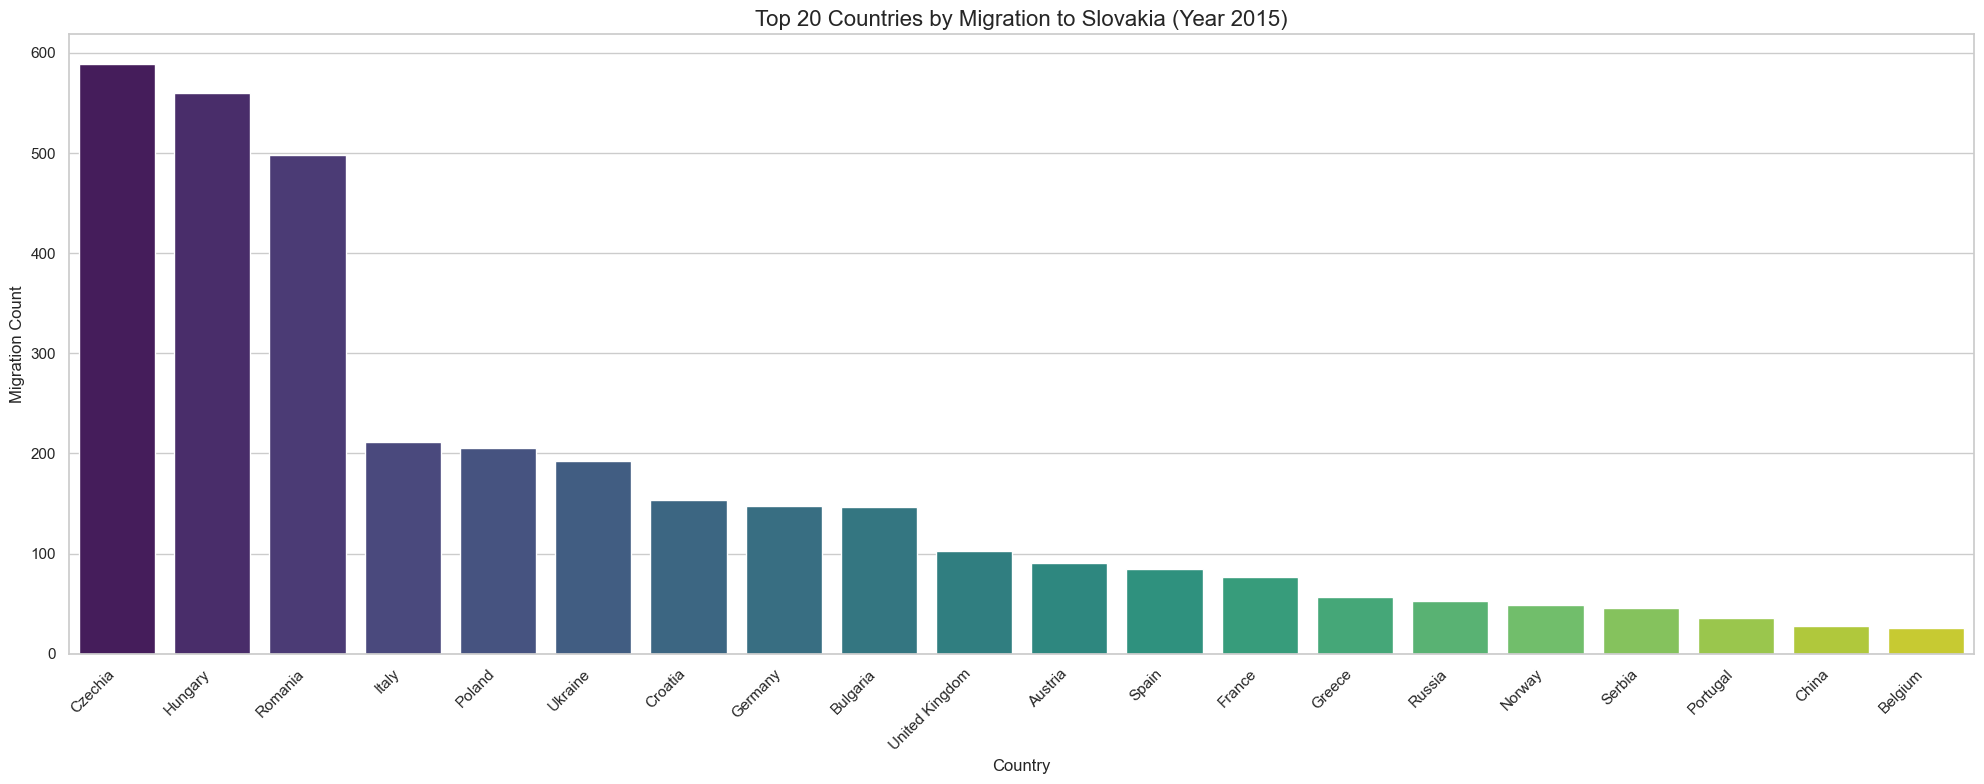

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


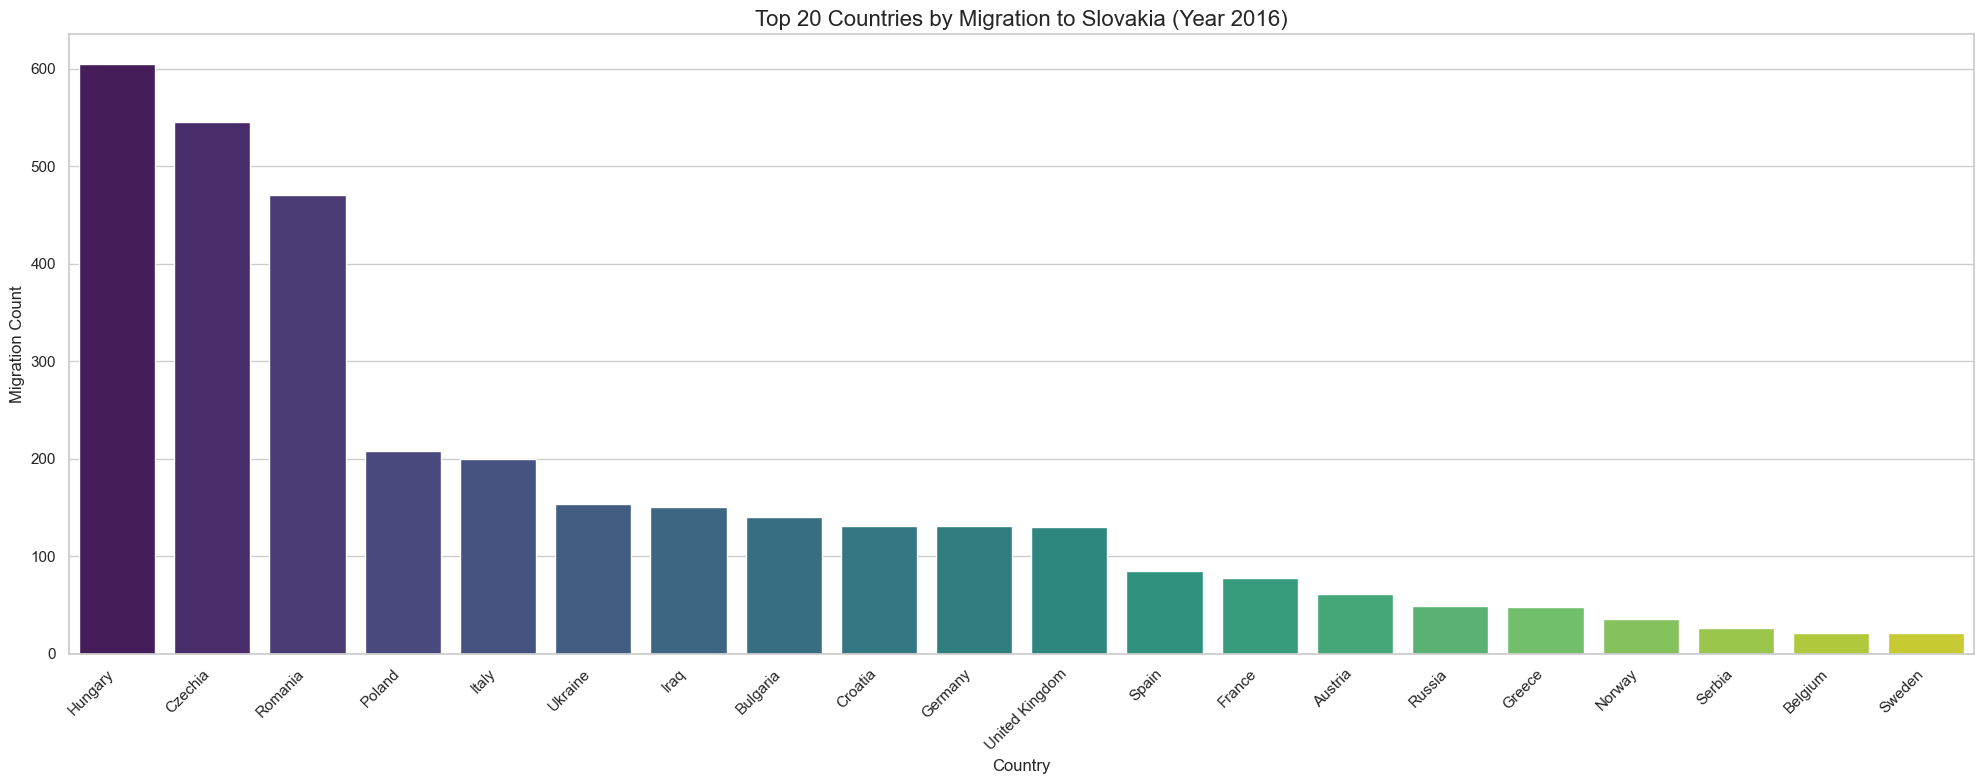

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


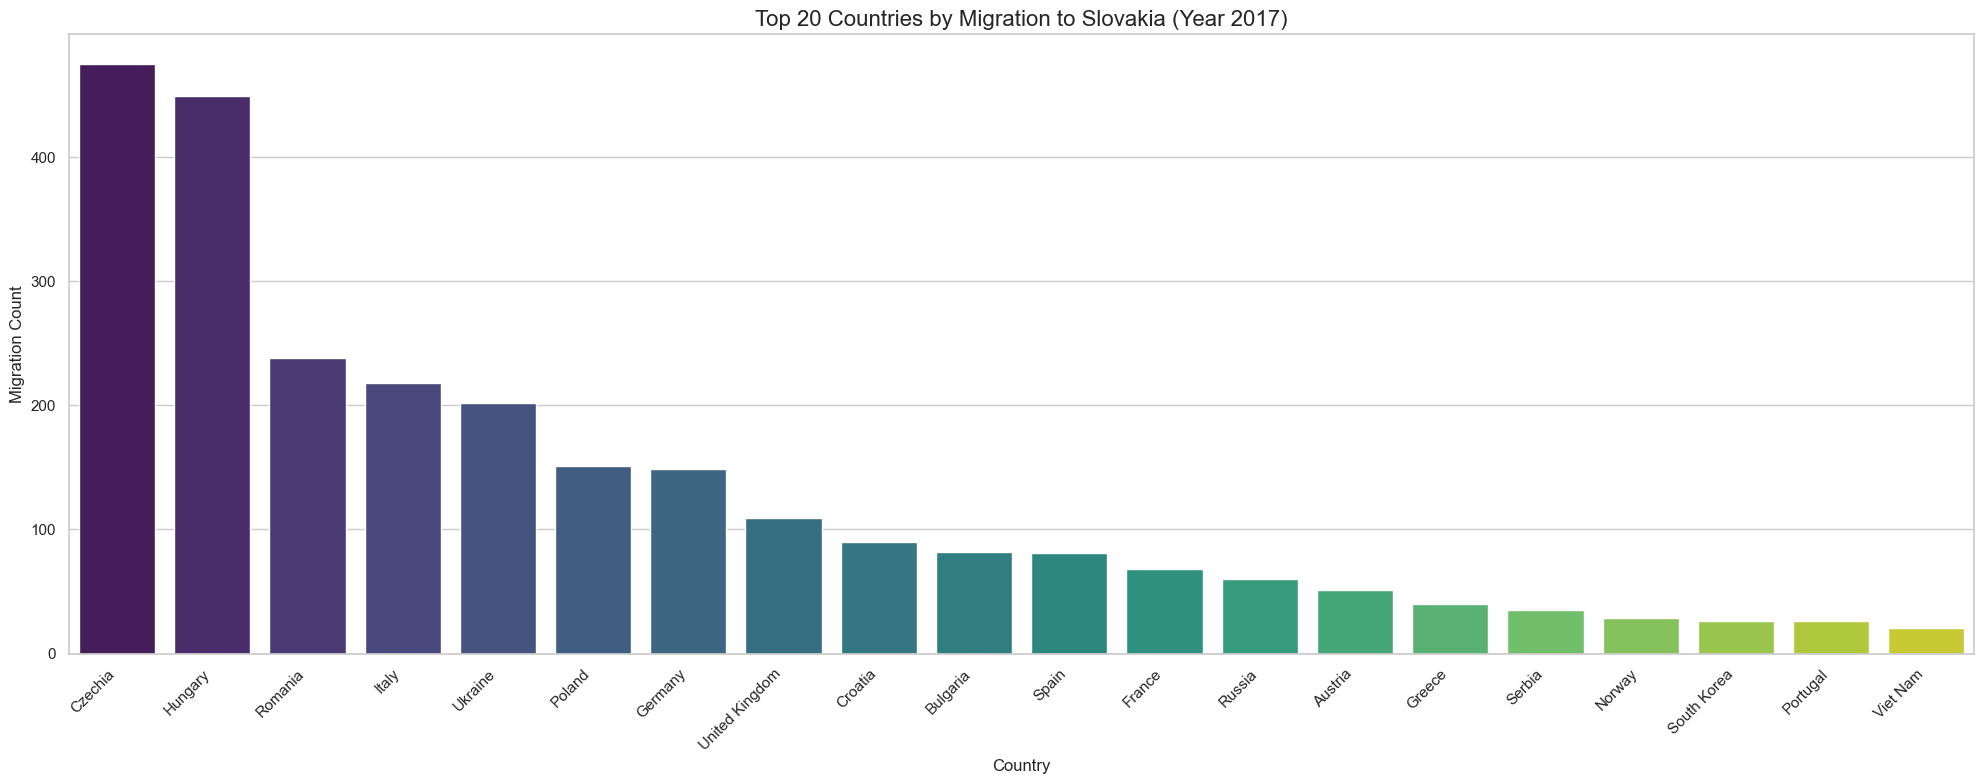

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


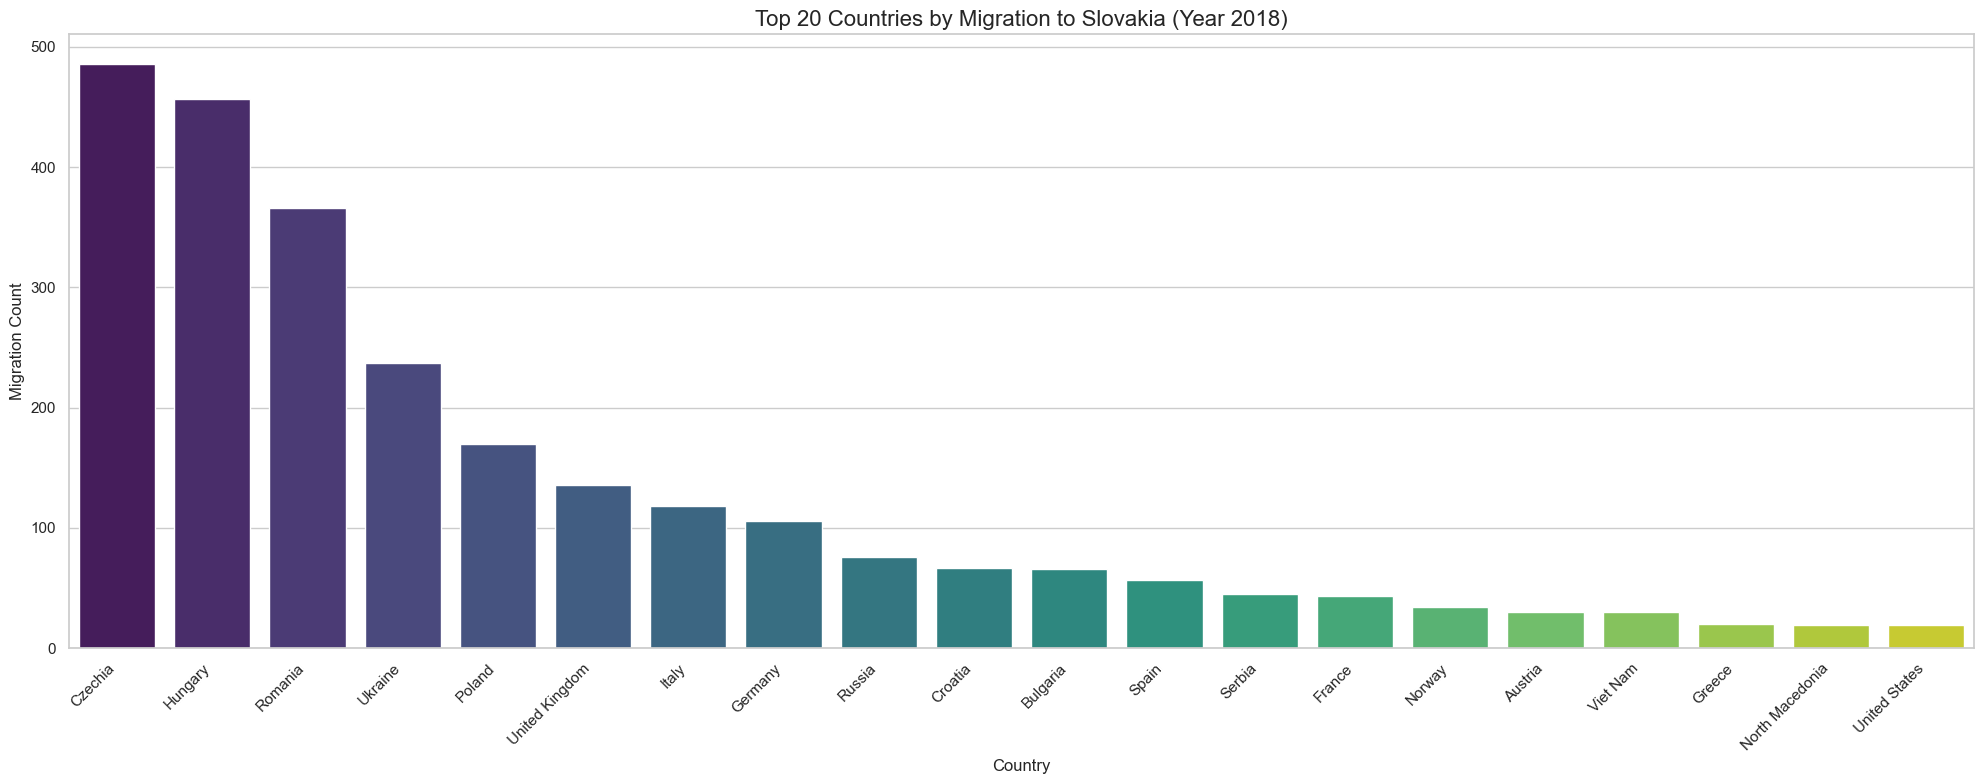

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


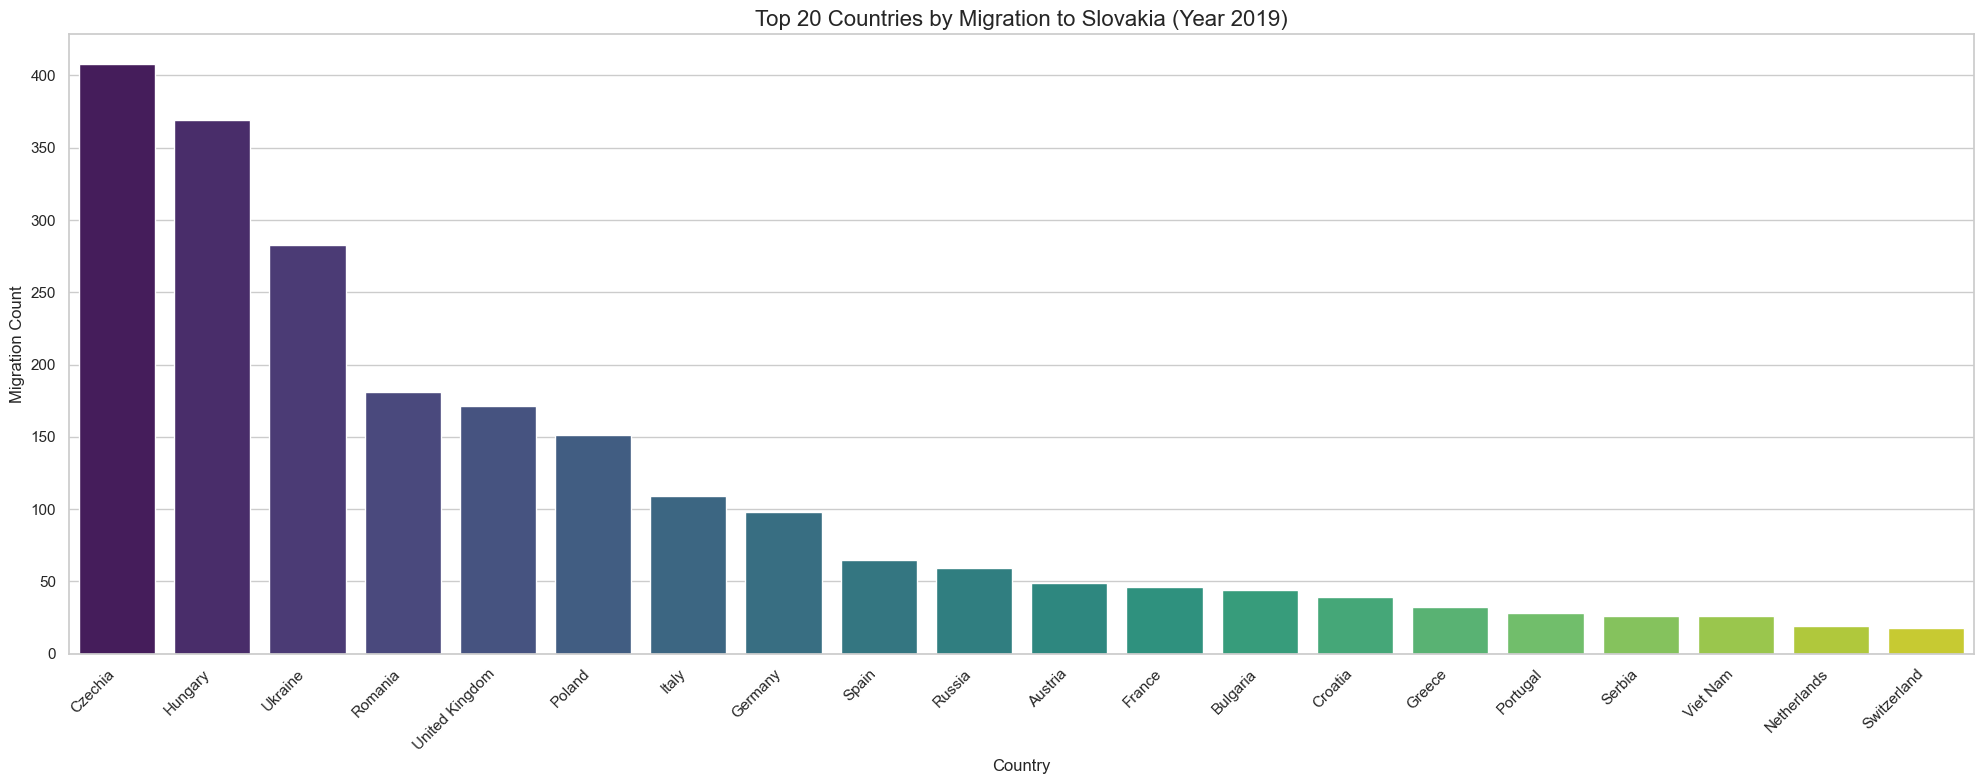

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


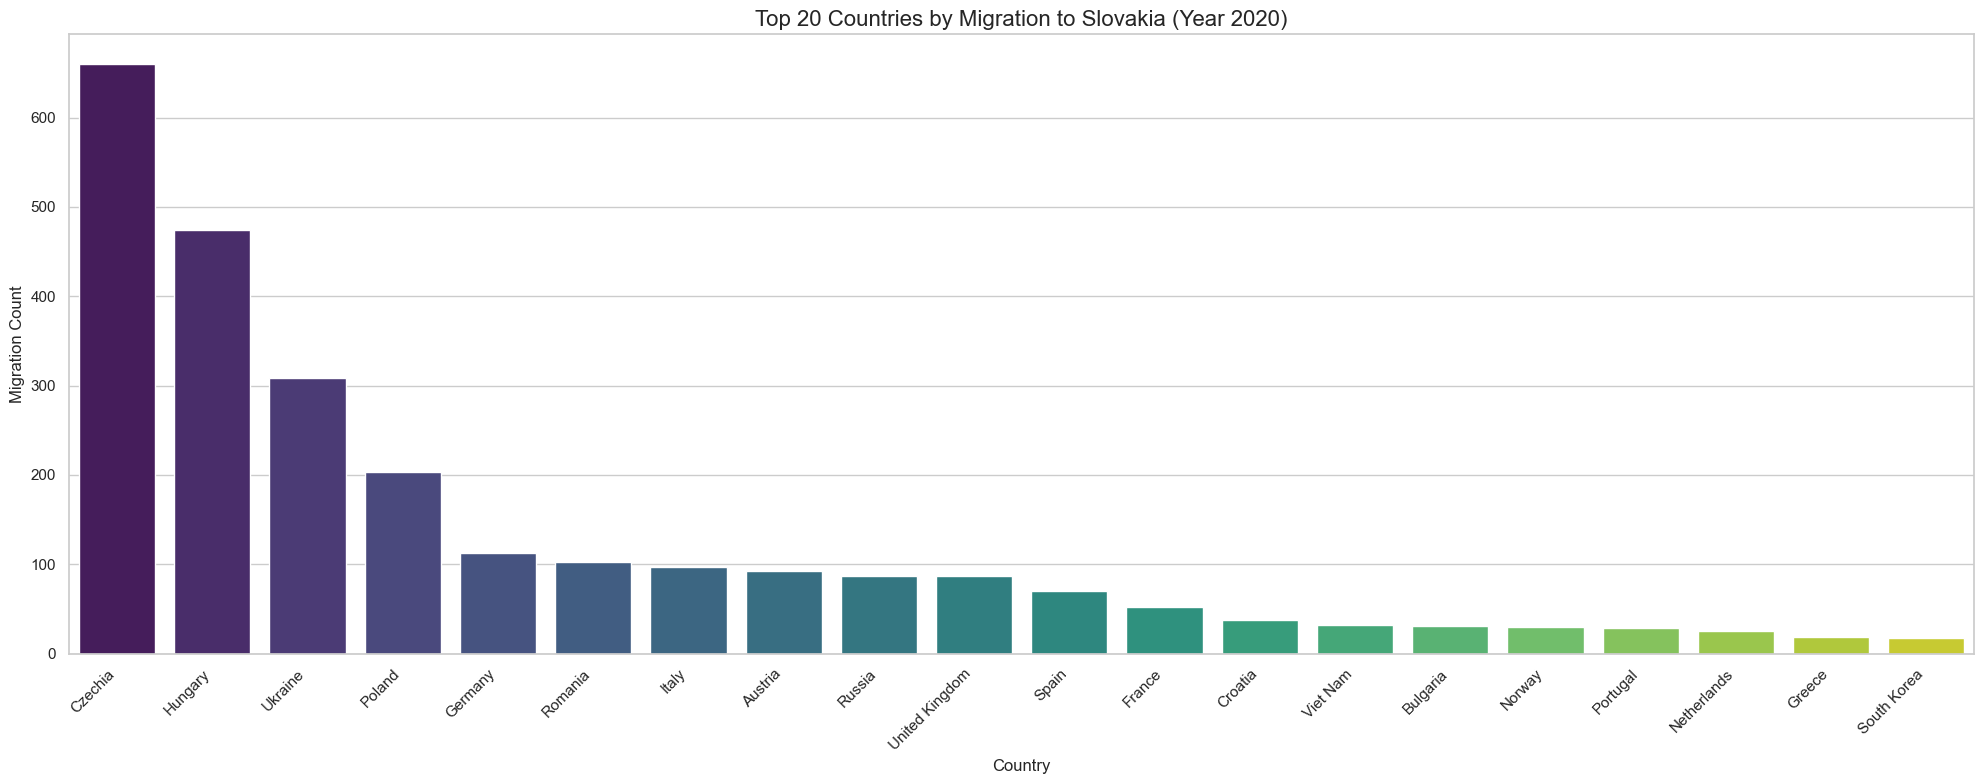

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


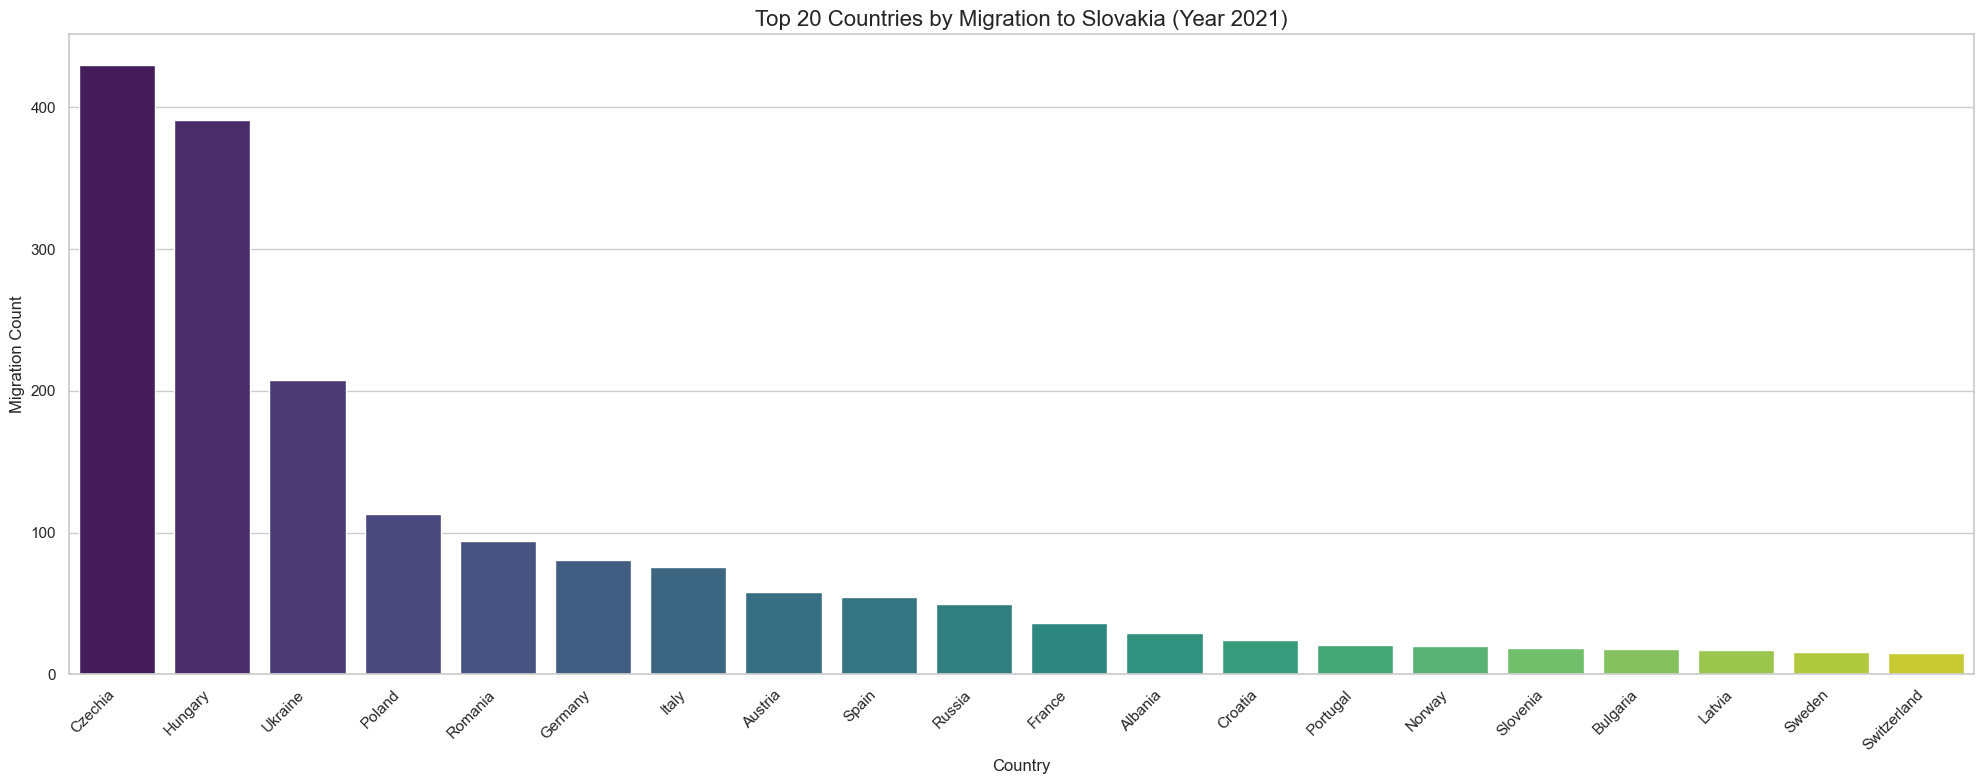

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


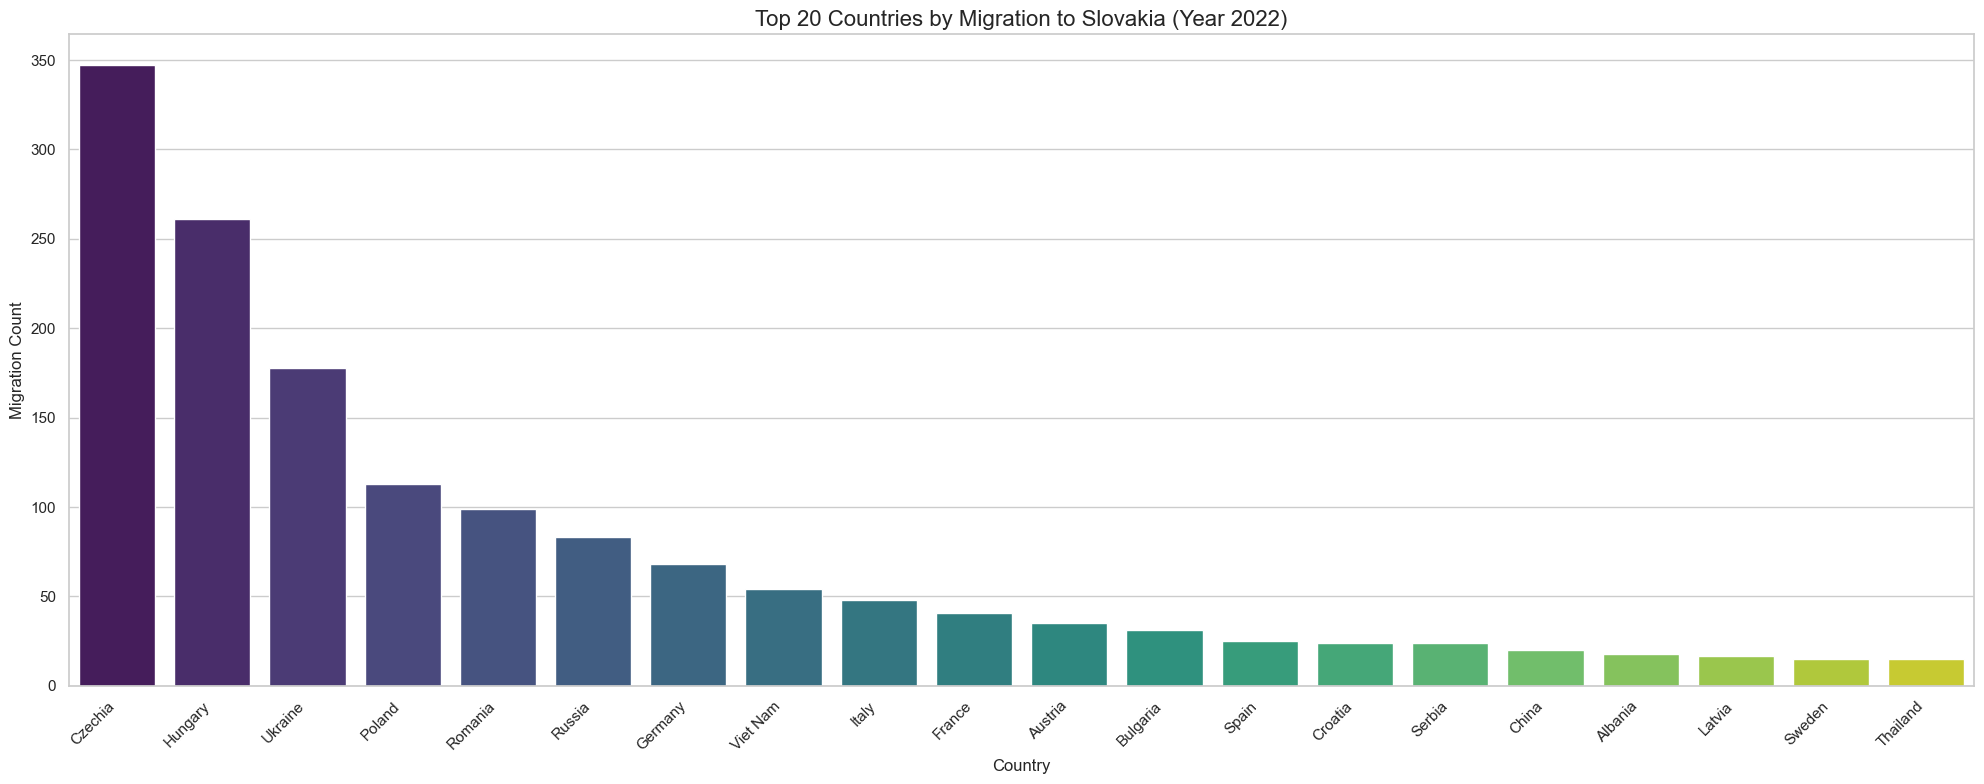

/tmp/ipykernel_576653/2308557529.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_data = filtered_df_no_slovakia[(df['year'] == year)]
/tmp/ipykernel_576653/2308557529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


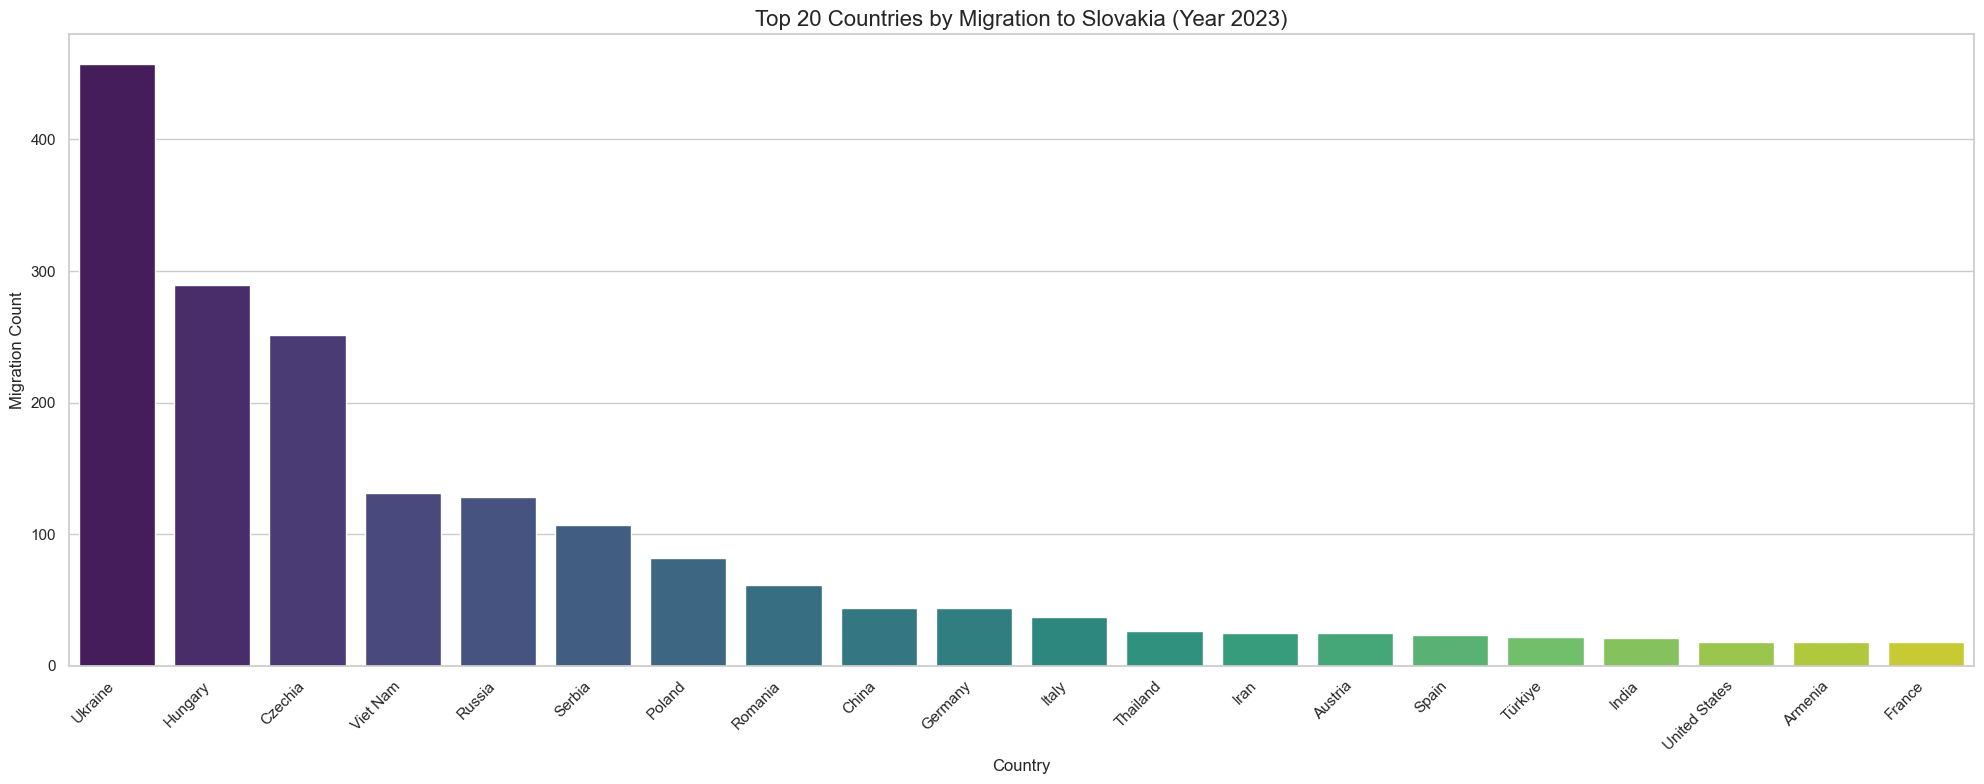

In [26]:
# Generate graphs for each year from 1998 to 2023
filtered_df_no_slovakia = filtered_df[(filtered_df['citizen_country'] != 'Slovakia')]

for year in range(2008, 2024):
    # Filter data for the specific year and 'sex' == 'Total'
    yearly_data = filtered_df_no_slovakia[(df['year'] == year)]

    # Group by 'citizen_country' and sum the counts
    yearly_grouped = yearly_data.groupby('citizen_country')['count'].sum().reset_index()

    # Sort the data in descending order of migration count and select the top 20 countries
    top_20_countries_yearly = yearly_grouped.sort_values(by='count', ascending=False).head(20)

    # Visualize the Top 20 Countries (Vertical Bar Plot) for the specific year
    figure = plt.figure(figsize=(20, 8))
    sns.barplot(
        data=top_20_countries_yearly,
        x='citizen_country',  # Country names on the x-axis
        y='count',  # Migration count on the y-axis
        palette='viridis'
    )

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add labels and title to the plot
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Migration Count', fontsize=12)
    plt.title(f'Top 20 Countries by Migration to Slovakia (Year {year})', fontsize=16)

    # Display the plot
    plt.tight_layout()
    plt.show()

    figure.savefig(f"../../Images/Slovakia/Migration/immigration/top_immigration_{year}.png", bbox_inches='tight')


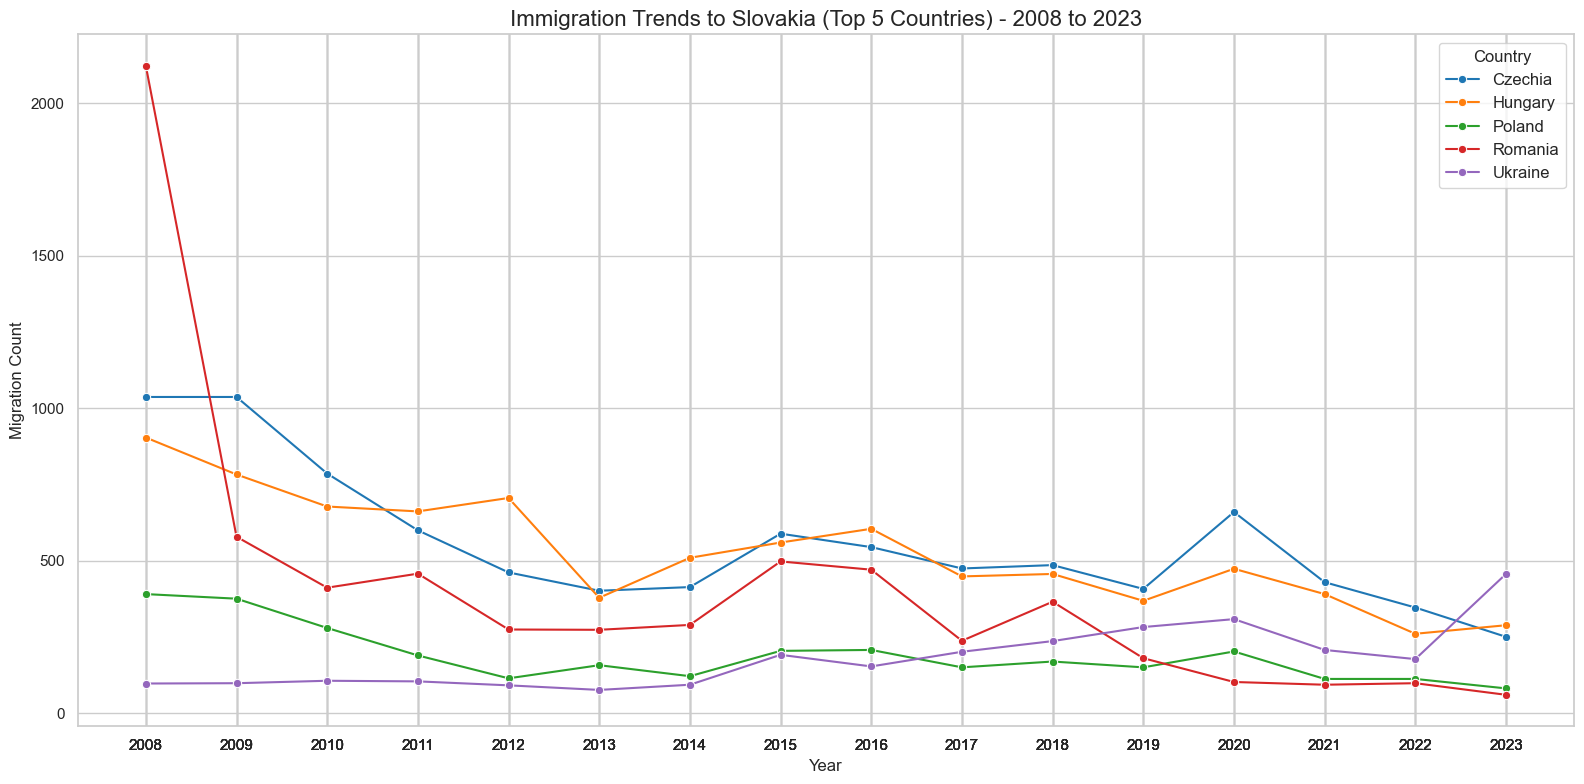

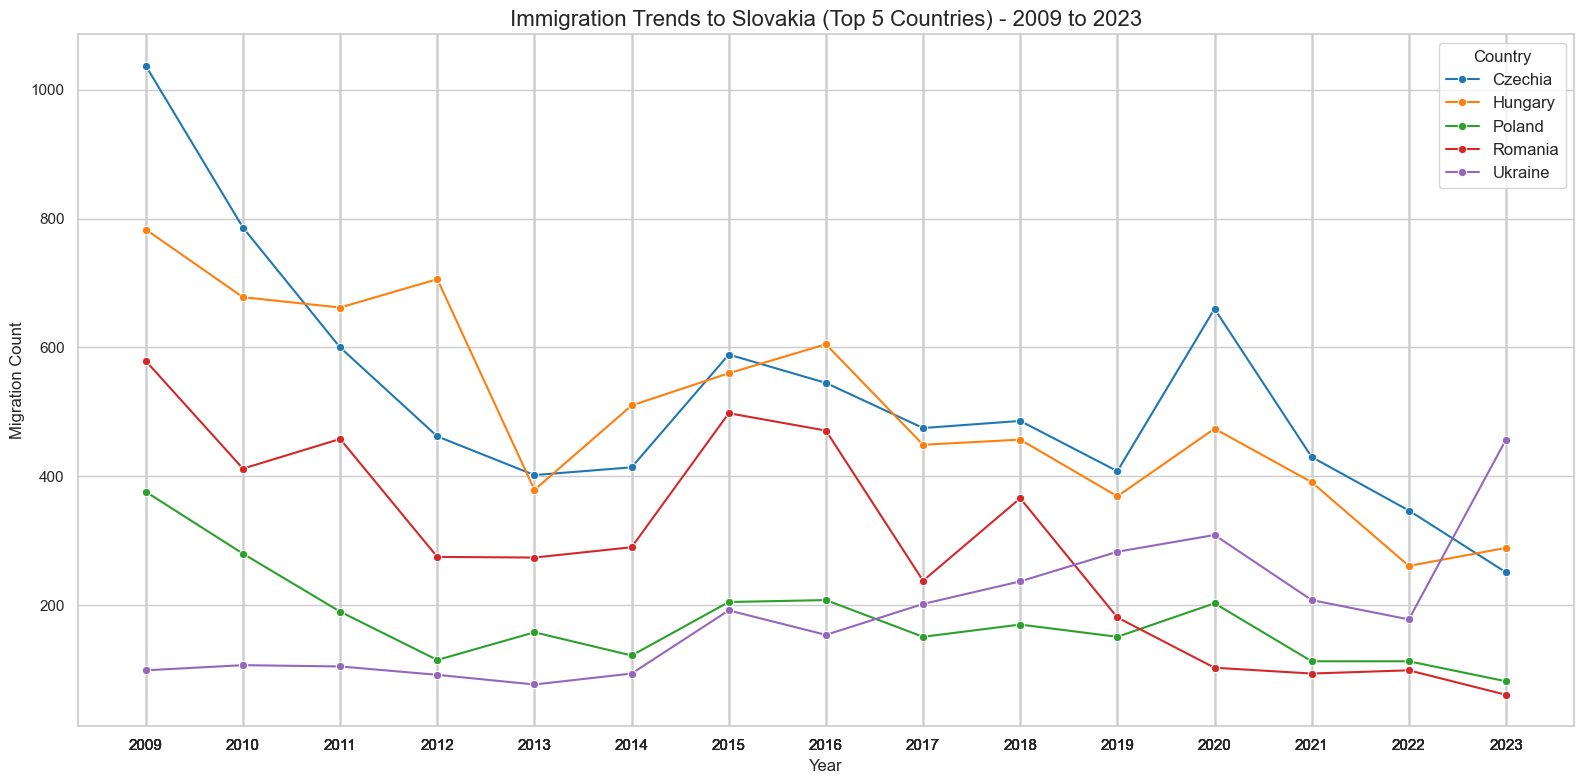

In [ ]:
# Group by 'citizen_country' and 'year', and sum the 'count' column
yearly_migration = filtered_df_no_slovakia.groupby(['citizen_country', 'year'])['count'].sum().reset_index()

# Get the top 5 countries by total migration count
top_countries = (
    yearly_migration.groupby('citizen_country')['count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the data for only the top 5 countries
top_data = yearly_migration[yearly_migration['citizen_country'].isin(top_countries)]

# Filter data for 2008 to 2023
data_2008_to_2023 = top_data[(top_data['year'] >= 2008) & (top_data['year'] <= 2023)]

# Filter data for 2009 to 2023
data_2009_to_2023 = top_data[(top_data['year'] >= 2009) & (top_data['year'] <= 2023)]

# Plot the line graph for 2008 to 2023
figure = plt.figure(figsize=(16, 8))
sns.lineplot(
    data=data_2008_to_2023,
    x='year',
    y='count',
    hue='citizen_country',
    marker='o',
    palette='tab10'
)

# Add labels and title for 2008 to 2023
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration Count', fontsize=12)
plt.title('Immigration Trends to Slovakia (Top 5 Countries) - 2008 to 2023', fontsize=16)
plt.legend(title='Country', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks=data_2008_to_2023['year'])
plt.show()

figure.savefig("../../Images/Slovakia/Migration/immigration/immigration_trends_2008_2023.png", bbox_inches='tight')

# Plot the line graph for 2009 to 2023
figure = plt.figure(figsize=(16, 8))
sns.lineplot(
    data=data_2009_to_2023,
    x='year',
    y='count',
    hue='citizen_country',
    marker='o',
    palette='tab10'
)

# Add labels and title for 2009 to 2023
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration Count', fontsize=12)
plt.title('Immigration Trends to Slovakia (Top 5 Countries) - 2009 to 2023', fontsize=16)
plt.legend(title='Country', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks=data_2009_to_2023['year'])
plt.show()

figure.savefig("../../Images/Slovakia/Migration/immigration/immigration_trends_2009_2023.png", bbox_inches='tight')

# Migration from regions of the world

/tmp/ipykernel_576653/3543687245.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


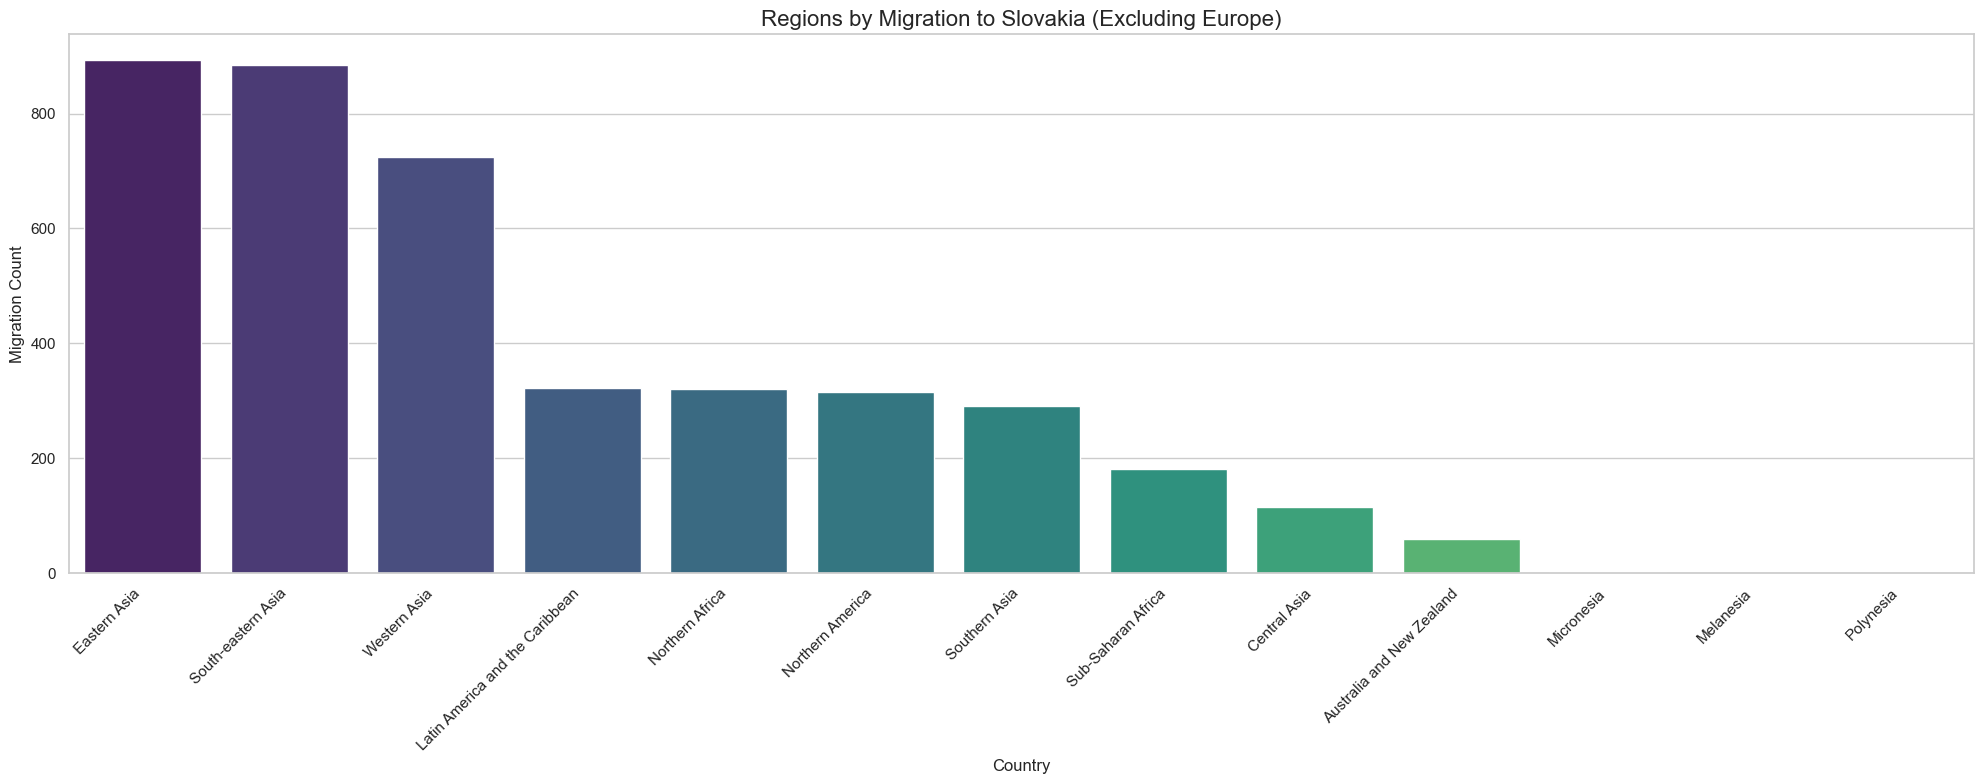

In [ ]:
filtered_df_no_europe = filtered_df[filtered_df['citizen_region'] != 'Europe']
region_migration = filtered_df_no_europe.groupby('citizen_sub_region')['count'].sum().reset_index()
region_migration = region_migration.sort_values(by='count', ascending=False)


figure = plt.figure(figsize=(20, 8))
sns.barplot(
    data=region_migration,
    x='citizen_sub_region',  # Country names on the x-axis
    y='count',  # Migration count on the y-axis
    palette='viridis'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title to the plot
plt.xlabel('Country', fontsize=12)
plt.ylabel('Migration Count', fontsize=12)
plt.title('Regions by Migration to Slovakia (Excluding Europe)', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

# figure.savefig("../../Images/Slovakia/Migration/immigration/regions_exc_europe.png", bbox_inches='tight')
